In [141]:
# 2019년 코드 (셀 1)
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat as py
import plotly.express as px
import matplotlib as mpl
import matplotlib.lines as mlines


# 2023년 코드 (셀 1)
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat as py

import matplotlib.pyplot as plt

plt.rcParams.update({'font.family' : "Malgun Gothic"})


In [142]:
# 2019년 코드 (셀 2)
# 데이터 불러오기
raw_welfare_2019 =pd.read_spss('D:/KNY_data/data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare_2019 =raw_welfare_2019.copy()
welfare_2019.head()

# 2023년 코드 (셀 2)
# 데이터 불러오기
raw_welfare_2023 =pd.read_spss('D:/KNY_data/과제/2023 data/Koweps_hpda18_2023_beta1.sav')

# 복사본 만들기
welfare_2023 =raw_welfare_2023.copy()
welfare_2023.head()

,h18_id,h18_ind,h18_sn,h18_merkey,h_new,h_new1,h18_cobf,p18_wsc,p18_wsl,p18_wgc,...,da18_324,da18_325,da18_326,da18_327,da18_6aq14,h18_pers_income1,h18_pers_income2,h18_pers_income3,h18_pers_income4,h18_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,0.0,NaN,0.256182,0.259465,1353.065043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,0.0,NaN,0.480753,0.397864,2539.170017,...,NaN,NaN,NaN,NaN,NaN,NaN,2160.0,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,0.0,NaN,0.232618,0.220094,1228.608612,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.591596,0.524757,3124.604491,...,NaN,NaN,NaN,NaN,NaN,3020.0,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.940481,0.858730,4967.289420,...,NaN,NaN,NaN,NaN,NaN,NaN,914.0,NaN,0.0,NaN


In [143]:
# 2019년 코드 (셀 3)
# 데이터 검토
# welfare_2019 # 앞부분, 뒷부분 확인
welfare_2019.shape # 행,열의 갯수
welfare_2019.info() # 열의 속성
welfare_2019.describe() #요약 통계
welfare_2019.head()

# 2023년 코드 (셀 3)
# 데이터 검토
# welfare_2023 # 앞부분, 뒷부분 확인
#welfare_2023.shape # 행,열의 갯수
#welfare_2023.info() # 열의 속성
#welfare_2023.describe() #요약 통계
welfare_2023.head()


KeyboardInterrupt: 

In [ ]:
# 2019년 코드 (셀 4)
# 분석에 필요한 열을 결정/ 열이름 변경
welfare_2019 =welfare_2019.rename(
    columns={'h14_g3'    : 'sex19',            #성별
             'h14_g4'    : 'birth19',          #태어난 년도
             'h14_g10'   : 'marriage_type19',  #혼인 상태
             'h14_g11'   : 'religion19',       #종교
             'p1402_8aq1': 'income19',         #월급
             'h14_eco9'  : 'code_job19',       #직업코드
             'h14_reg7'  : 'code_region19'})   #지역 코드

# 2023년 코드 (셀 4)
# 분석에 필요한 열을 결정/ 열이름 변경
welfare_2023 =welfare_2023.rename(
    columns={'h18_g3'    : 'sex23',            #성별
             'h18_g4'    : 'birth23',          #태어난 년도
             'h18_g10'   : 'marriage_type23',  #혼인 상태
             'h18_g11'   : 'religion23',       #종교
             'p1802_8aq1': 'income23',         #월급
             'h18_eco9'  : 'code_job23',       #직업코드
             'h18_reg7'  : 'code_region23'})   #지역 코드

In [ ]:
# 2019년 코드 (셀 5)
# 성별 변수 검토 및 전처리
print(welfare_2019['sex19'].dtype) # 타입 출력

# 2023년 코드 (셀 5)
# 성별 변수 검토 및 전처리
print(welfare_2023['sex23'].dtype) # 타입 출력

float64
float64


In [ ]:
# 2019년 코드 (셀 6)
print(welfare_2019['sex19'].value_counts()) #빈도수

# 2023년 코드 (셀 6)
print(welfare_2023['sex23'].value_counts()) #빈도수

sex19
2.0    7913
1.0    6505
Name: count, dtype: int64
sex23
2.0    8787
1.0    7144
Name: count, dtype: int64


In [ ]:
# 2019년 코드 (셀 7)
# 이상치 결측 처리
welfare_2019['sex19'] =np.where(welfare_2019['sex19'] ==9, np.nan, welfare_2019['sex19'])

# 결측 확인 #loc<< 이거 행 변경 기억하기.
welfare_2019['sex19'].isna().sum()

# 2023년 코드 (셀 7)
# 이상치 결측 처리
welfare_2023['sex23'] =np.where(welfare_2023['sex23'] ==9, np.nan, welfare_2023['sex23'])

# 결측 확인 #loc<< 이거 행 변경 기억하기.
welfare_2023['sex23'].isna().sum()

np.int64(0)

In [ ]:
# 2019년 코드 (셀 8)
# 성별 항목 이름 부여
welfare_2019['sex19']= np.where(welfare_2019['sex19'] == 1, 'male','female')

#빈도구하기
print(welfare_2019['sex19'].value_counts())

# 2023년 코드 (셀 8)
# 성별 항목 이름 부여
welfare_2023['sex23']= np.where(welfare_2023['sex23'] == 1, 'male','female')

#빈도구하기
print(welfare_2023['sex23'].value_counts())

sex19
female    7913
male      6505
Name: count, dtype: int64
sex23
female    8787
male      7144
Name: count, dtype: int64


<Axes: xlabel='sex19', ylabel='count'>

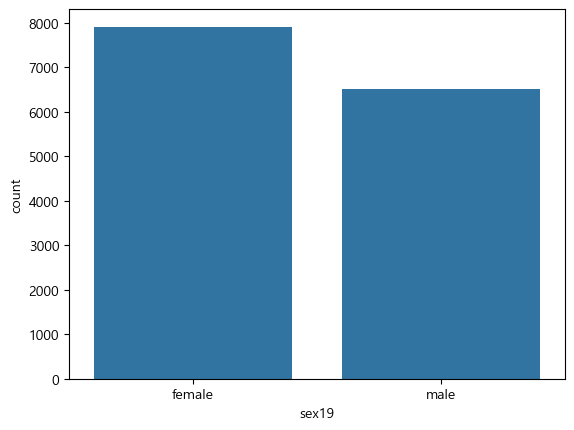

In [ ]:
# 2019년 코드 (셀 9)
# 빈도 막대 그래프 # seaborn을 쓰고있다는것 map plot을 안쓰고있고
sns.countplot(data =welfare_2019, x='sex19') 


<Axes: xlabel='sex23', ylabel='count'>

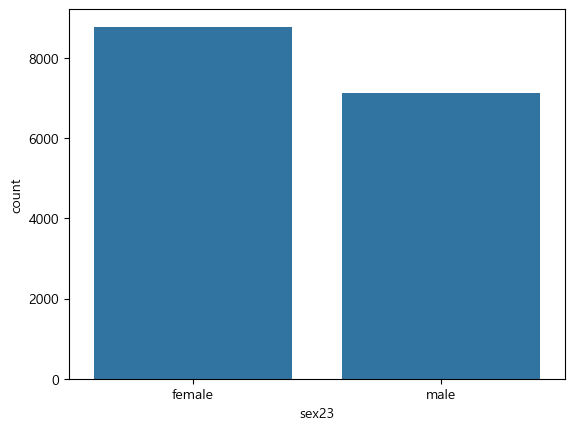

In [ ]:

# 2023년 코드 (셀 9)
# 빈도 막대 그래프 # seaborn을 쓰고있다는것 map plot을 안쓰고있고
sns.countplot(data =welfare_2023, x='sex23') 

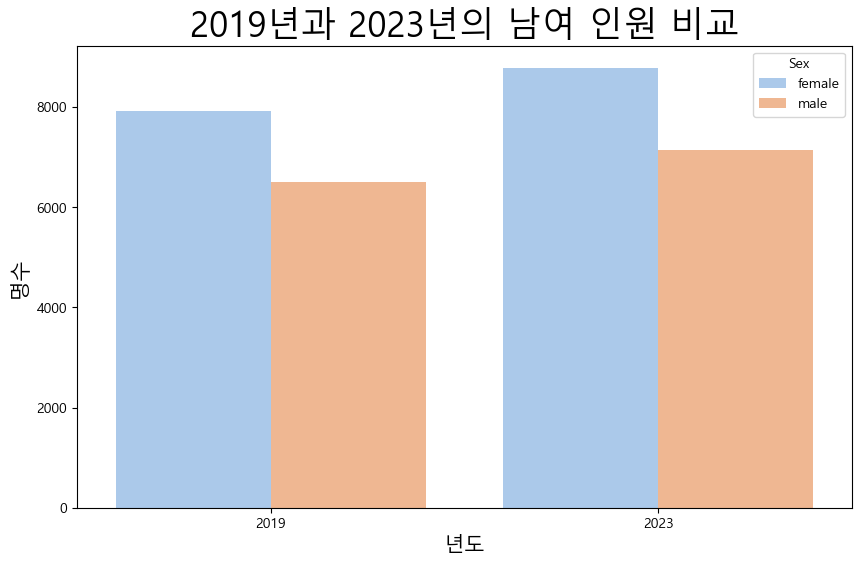

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 (데이터 로드 필요)
# welfare_2019 = pd.read_csv('welfare_2019.csv')  # 2019년 데이터 로드
# welfare_2023 = pd.read_csv('welfare_2023.csv')  # 2023년 데이터 로드

# 2019년 성별 데이터 처리
count_2019 = welfare_2019['sex19'].value_counts().reset_index()
count_2019.columns = ['Sex', 'Count']
count_2019['Year'] = '2019'

# 2023년 성별 데이터 처리
count_2023 = welfare_2023['sex23'].value_counts().reset_index()
count_2023.columns = ['Sex', 'Count']
count_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([count_2019, count_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Year', y='Count', hue='Sex', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 남여 인원 비교', fontsize = 25)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('명수', fontsize = 15)

# 차트 표시
plt.show()


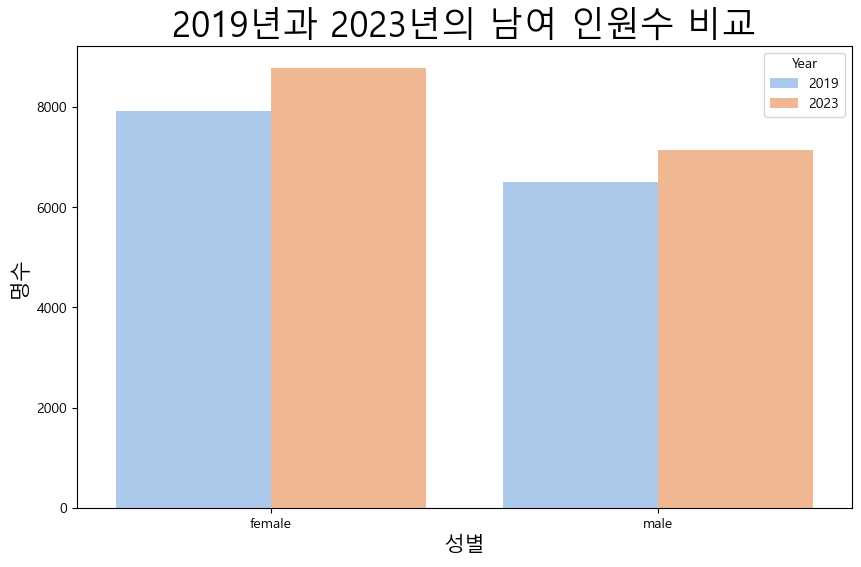

In [ ]:

# 2019년 성별 데이터 처리
count_2019 = welfare_2019['sex19'].value_counts().reset_index()
count_2019.columns = ['Sex', 'Count']
count_2019['Year'] = '2019'

# 2023년 성별 데이터 처리
count_2023 = welfare_2023['sex23'].value_counts().reset_index()
count_2023.columns = ['Sex', 'Count']
count_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([count_2019, count_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Sex', y='Count', hue='Year', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 남여 인원수 비교', fontsize = 25)
plt.xlabel('성별', fontsize = 15)
plt.ylabel('명수', fontsize = 15)

# 차트 표시
plt.show()

In [ ]:
# 2019년 코드 (셀 10)
# 월급 # 변수 타입 출력
print(welfare_2019['income19'].dtype)

# 2023년 코드 (셀 10)
# 월급 # 변수 타입 출력
print(welfare_2023['income23'].dtype)

float64
float64


<Axes: xlabel='income19', ylabel='Count'>

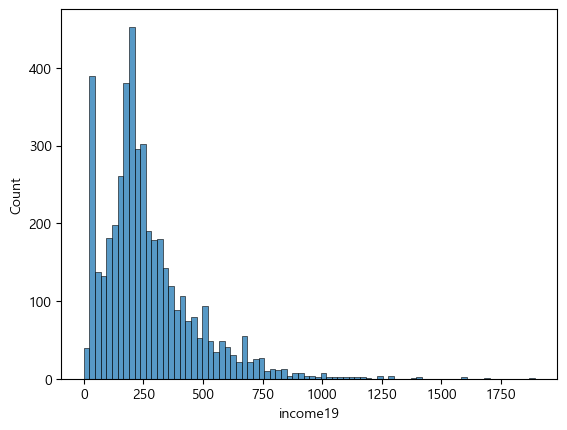

In [ ]:
# 2019년 코드 (셀 11)
sns.histplot(data=welfare_2019, x='income19')


<Axes: xlabel='income23', ylabel='Count'>

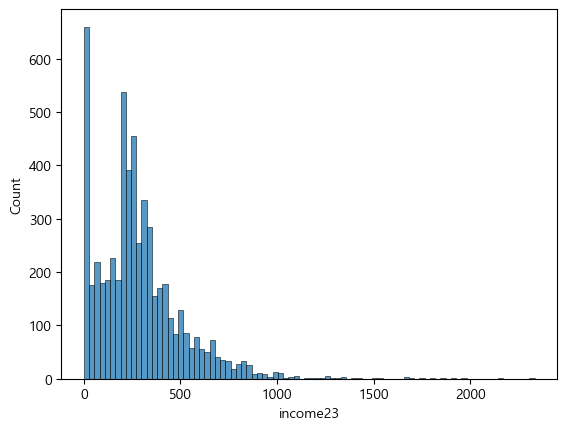

In [ ]:

# 2023년 코드 (셀 11)
sns.histplot(data=welfare_2023, x='income23')

In [ ]:

# # 일반 박스플롯 그래프
# # welfare_2019 = pd.read_csv('welfare_2019.csv')  # 2019년 데이터 로드
# # welfare_2023 = pd.read_csv('welfare_2023.csv')  # 2023년 데이터 로드

# # 2019년 수입 데이터 처리
# income_2019 = welfare_2019['2019_income'].dropna()
# income_2019_df = pd.DataFrame({
#     'Income': income_2019,
#     'Year': '2019'
# })

# # 2023년 수입 데이터 처리
# income_2023 = welfare_2023['2023_income'].dropna()
# income_2023_df = pd.DataFrame({
#     'Income': income_2023,
#     'Year': '2023'
# })

# # 두 데이터프레임 병합
# comparison_df = pd.concat([income_2019_df, income_2023_df], ignore_index=True)

# # 상자 그래프 생성
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')

# # 차트 제목 및 레이블 설정
# plt.title('Income Distribution Comparison for 2019 and 2023')
# plt.xlabel('Year')
# plt.ylabel('Income')

# # 차트 표시
# plt.show()


C:\Users\04-06\AppData\Local\Temp\ipykernel_9836\3900638554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')


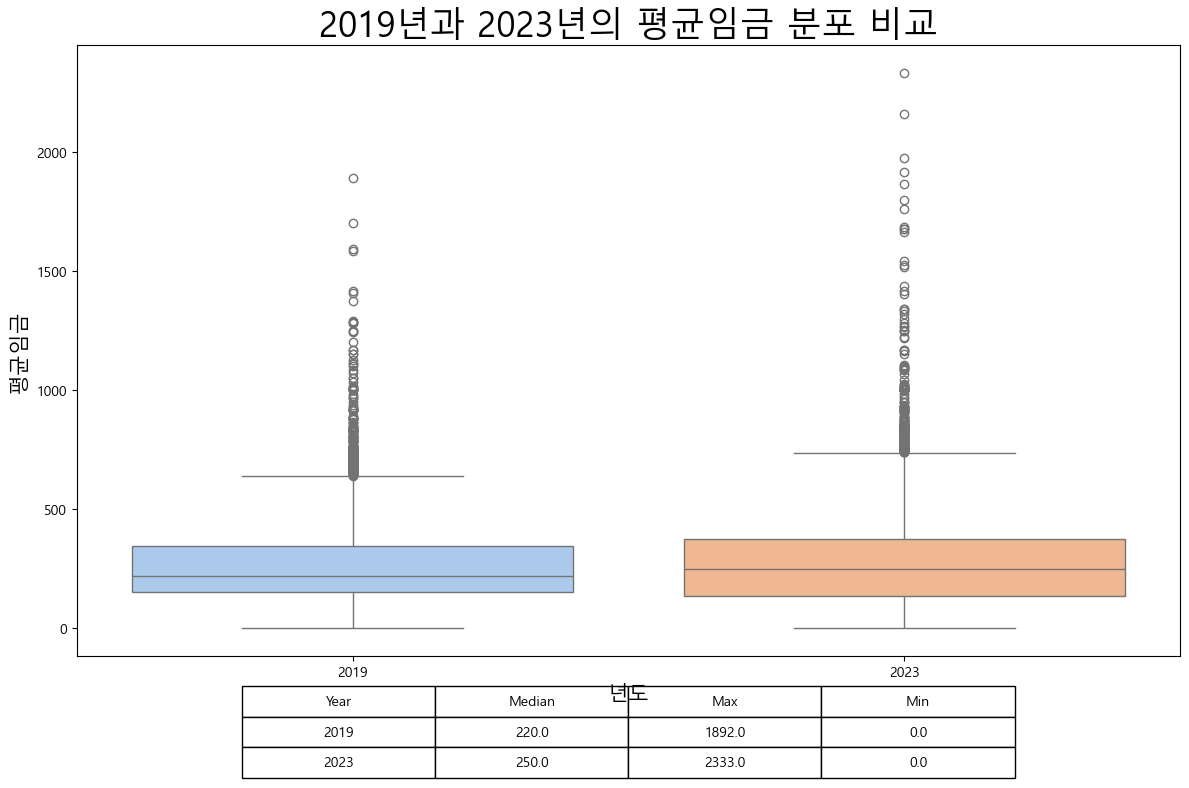

In [ ]:
# 2019년 수입 데이터 처리
income_2019 = welfare_2019['income19'].dropna()
income_2019_df = pd.DataFrame({
    'Income': income_2019,
    'Year': '2019'
})

# 2023년 수입 데이터 처리
income_2023 = welfare_2023['income23'].dropna()
income_2023_df = pd.DataFrame({
    'Income': income_2023,
    'Year': '2023'
})

# 두 데이터프레임 병합
comparison_df = pd.concat([income_2019_df, income_2023_df], ignore_index=True)

# 상자 그래프 생성
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')

# 중앙값, 최대값, 최소값 계산
stats = comparison_df.groupby('Year')['Income'].agg(['median', 'max', 'min']).reset_index()

# 데이터 테이블 생성
table_data = []
for _, row in stats.iterrows():
    table_data.append([row['Year'], row['median'], row['max'], row['min']])

# 데이터 테이블 추가
table = plt.table(cellText=table_data,
                  colLabels=['Year', 'Median', 'Max', 'Min'],
                  cellLoc='center',
                  loc='upper center',
                  bbox=[0.15, -0.2, 0.7, 0.15])  # 위치 조정

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 평균임금 분포 비교', fontsize = 25)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('평균임금', fontsize = 15)

# 그래프 레이아웃 조정
plt.tight_layout()

# 차트 표시
plt.show()

In [ ]:
welfare_2023['income23'].describe()

count    5630.000000
mean      284.461989
std       222.592542
min         0.000000
25%       133.250000
50%       250.000000
75%       375.000000
max      2333.000000
Name: income23, dtype: float64

C:\Users\04-06\AppData\Local\Temp\ipykernel_9836\466819953.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')


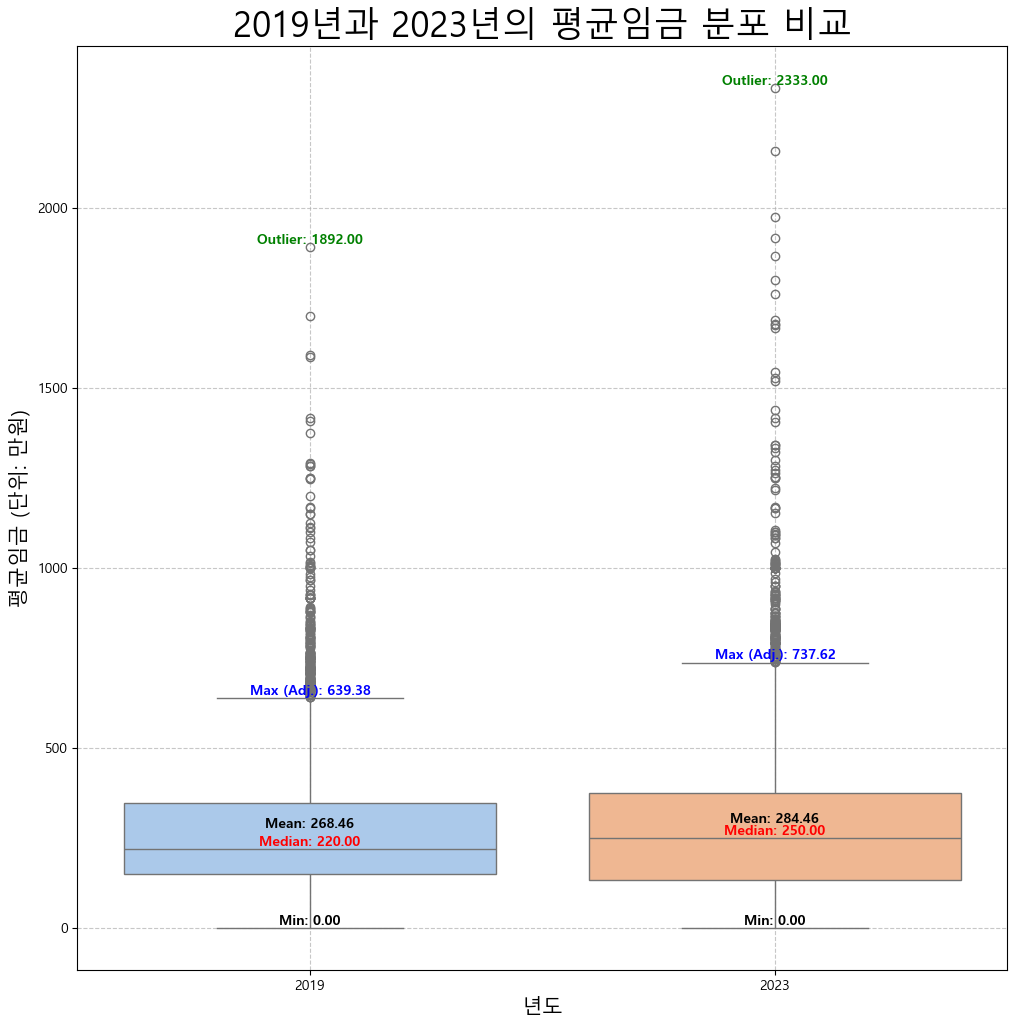

In [ ]:
# 2019년 수입 데이터 처리
income_2019 = welfare_2019['income19'].dropna()
income_2019_df = pd.DataFrame({
    'Income': income_2019,
    'Year': '2019'
})

# 2023년 수입 데이터 처리
income_2023 = welfare_2023['income23'].dropna()
income_2023_df = pd.DataFrame({
    'Income': income_2023,
    'Year': '2023'
})

# 두 데이터프레임 병합
comparison_df = pd.concat([income_2019_df, income_2023_df], ignore_index=True)

# 상자 그래프 생성
plt.figure(figsize=(12, 12))
ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')

# 중앙값, 최대값, 최소값 및 Q1, Q3, IQR 계산
for year in comparison_df['Year'].unique():
    data = comparison_df[comparison_df['Year'] == year]['Income']
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    median = data.median()
    mean = data.mean()
    min = row['min']
    max = Q3 + 1.5 * IQR
    outlier = data.max()
    
    # 값 표시
    ax.text(year, median, f'Median: {median:.2f}', color='red', ha='center', va='bottom', fontsize=10, weight='bold')
    ax.text(year, mean, f'Mean: {mean:.2f}', color='black', ha='center', va='bottom', fontsize=10, weight='bold')

    ax.text(year, min, f'Min: {min:.2f}', color='black', ha='center', va='bottom', fontsize=10, weight='bold')
    ax.text(year, max, f'Max (Adj.): {max:.2f}', color='blue', ha='center', va='bottom', fontsize=10, weight='bold')
    ax.text(year, outlier, f'Outlier: {outlier:.2f}', color='green', ha='center', va='bottom', fontsize=10, weight='bold')

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 평균임금 분포 비교', fontsize = 25)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('평균임금 (단위: 만원)', fontsize = 15)

# 그래프의 그리드 선 추가
ax.grid(True, linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

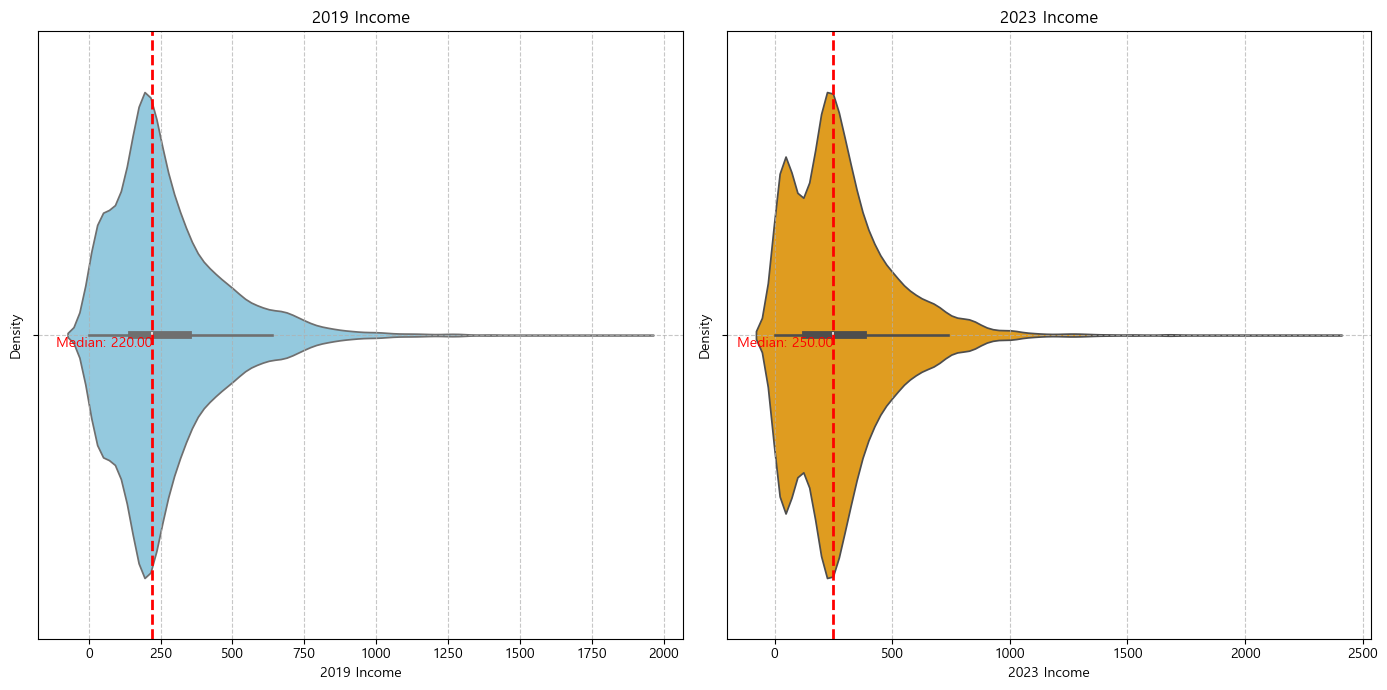

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 2019년 데이터의 바이올렛 플롯 생성
sns.violinplot(data=welfare_2019, x="income19", ax=axes[0], color='skyblue')
axes[0].set_title("2019 Income")
axes[0].set_xlabel("2019 Income")
axes[0].set_ylabel("Density")
axes[0].grid(True, linestyle='--', alpha=0.7)  # 그리드선 추가

# 중앙값 계산 및 표시
median_2019 = welfare_2019['income19'].median()
axes[0].axvline(median_2019, color='red', linestyle='--', linewidth=2)
axes[0].text(median_2019, 0.02, f'Median: {median_2019:.2f}', color='red', 
             horizontalalignment='right', fontsize=10)

# 2023년 데이터의 바이올렛 플롯 생성
sns.violinplot(data=welfare_2023, x="income23", ax=axes[1], color='orange')
axes[1].set_title("2023 Income")
axes[1].set_xlabel("2023 Income")
axes[1].set_ylabel("Density")
axes[1].grid(True, linestyle='--', alpha=0.7)  # 그리드선 추가

# 중앙값 계산 및 표시
median_2023 = welfare_2023['income23'].median()
axes[1].axvline(median_2023, color='red', linestyle='--', linewidth=2)
axes[1].text(median_2023, 0.02, f'Median: {median_2023:.2f}', color='red', 
             horizontalalignment='right', fontsize=10)

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [ ]:
# 2019년 코드 (셀 12)
print(welfare_2019['income19'].describe()) #이상치확인

# 2023년 코드 (셀 12)
print(welfare_2023['income23'].describe()) #이상치확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income19, dtype: float64
count    5630.000000
mean      284.461989
std       222.592542
min         0.000000
25%       133.250000
50%       250.000000
75%       375.000000
max      2333.000000
Name: income23, dtype: float64


In [ ]:
# 2019년 코드 (셀 13)
print(welfare_2019['income19'].isna().sum()) # 결측지 확인

# 2023년 코드 (셀 13)
print(welfare_2023['income23'].isna().sum()) # 결측지 확인

9884
10301


In [ ]:
# 2019년 코드 (셀 14)
# 이상치 결측 처리
welfare_2019['income19'] =np.where(welfare_2019['income19'] == 9999, np.nan,welfare_2019['income19'])
# 결측치 확인
print(welfare_2019['income19'].isna().sum())

# 2023년 코드 (셀 14)
# 이상치 결측 처리
welfare_2023['income23'] =np.where(welfare_2023['income23'] == 9999, np.nan,welfare_2023['income23'])
# 결측치 확인
print(welfare_2023['income23'].isna().sum())

9884
10301


In [ ]:
# 2019년 코드 (셀 15)
# 성별 월급 평균
sex_income =welfare_2019.dropna(subset=['income19']) \
                   .groupby('sex19',as_index=False) \
                   .agg(mean_income = ('income19', 'mean'))  
sex_income   


,sex19,mean_income
0,female,186.293096
1,male,349.037571


In [ ]:

# 2023년 코드 (셀 15)
# 성별 월급 평균
sex_income =welfare_2023.dropna(subset=['income23']) \
                   .groupby('sex23',as_index=False) \
                   .agg(mean_income = ('income23', 'mean'))  
sex_income   

,sex23,mean_income
0,female,200.327693
1,male,373.581565


In [ ]:

# # 2023년 코드 (셀 15)
# # 성별 월급 평균
# # sex_income =welfare_2023.dropna(subset=['income23']) \
#                    .groupby('2023_sex',as_index=False) \
#                    .agg(mean_income = ('income23', 'mean'))  
# sex_income   

<Axes: xlabel='sex23', ylabel='mean_income'>

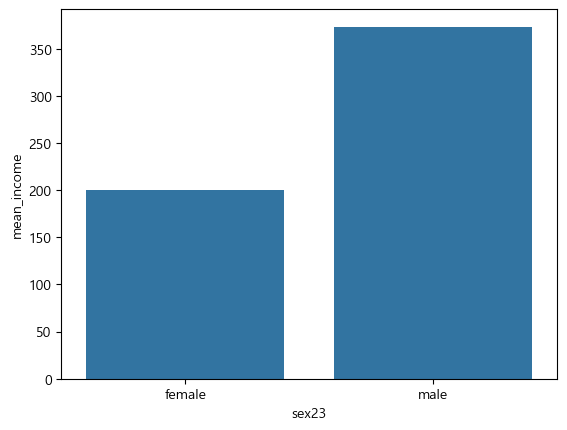

In [ ]:
# 2023년 코드 (셀 16)
sns.barplot(data=sex_income, x= 'sex23', y='mean_income')


In [ ]:

# 2019년 코드 (셀 16)
# sns.barplot(data=sex_income, x='2019_sex', y='mean_income')

Comparison of Average Income by Gender in 2019 and 2023

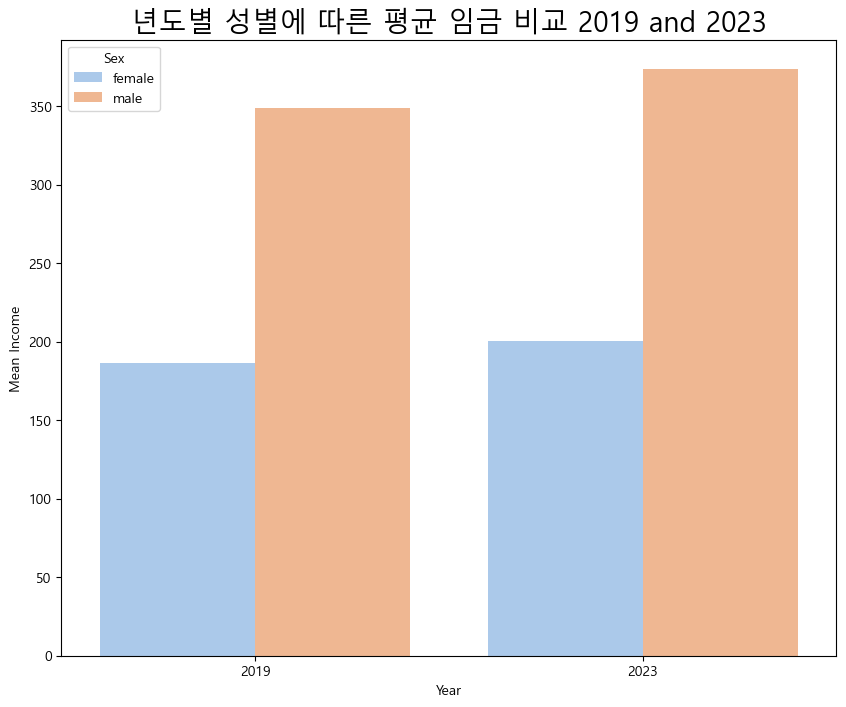

In [ ]:
# 2019년 성별별 평균 수입 계산
mean_income_2019 = welfare_2019.groupby('sex19')['income19'].mean().reset_index()
mean_income_2019.columns = ['Sex', 'Mean_Income']
mean_income_2019['Year'] = '2019'

# 2023년 성별별 평균 수입 계산
mean_income_2023 = welfare_2023.groupby('sex23')['income23'].mean().reset_index()
mean_income_2023.columns = ['Sex', 'Mean_Income']
mean_income_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([mean_income_2019, mean_income_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 8))
sns.barplot(data=comparison_df, x='Year', y='Mean_Income', hue='Sex', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('년도별 성별에 따른 평균 임금 비교 2019 and 2023', fontsize= 20)
plt.xlabel('Year')
plt.ylabel('Mean Income')

# 차트 표시
plt.show()

2023년과 2019년도의 남/녀 평균 소득 차이
Comparison of Average Income by Gender in 2019 and 2023

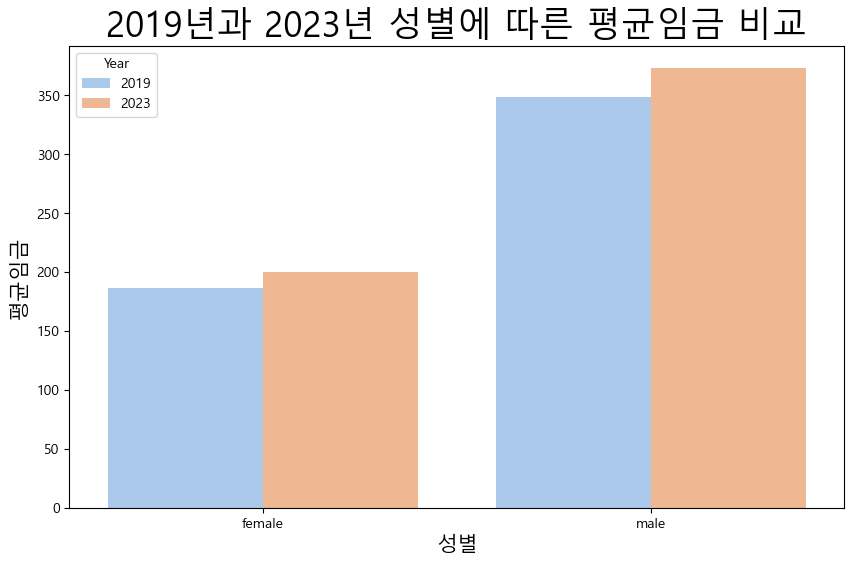

In [ ]:
# 2019년 성별별 평균 수입 계산
mean_income_2019 = welfare_2019.groupby('sex19')['income19'].mean().reset_index()
mean_income_2019.columns = ['Sex', 'Mean_Income']
mean_income_2019['Year'] = '2019'

# 2023년 성별별 평균 수입 계산
mean_income_2023 = welfare_2023.groupby('sex23')['income23'].mean().reset_index()
mean_income_2023.columns = ['Sex', 'Mean_Income']
mean_income_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([mean_income_2019, mean_income_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Sex', y='Mean_Income', hue='Year', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년 성별에 따른 평균임금 비교', fontsize= 25)
plt.xlabel('성별', fontsize= 15)
plt.ylabel('평균임금', fontsize= 15)

# 차트 표시
plt.show()

In [ ]:
# 2019년 코드 (셀 17)
# 나이와 월급
print(welfare_2019['birth19'].dtype)

# 2023년 코드 (셀 17)
# 나이와 월급
print(welfare_2023['birth23'].dtype)

float64
float64


In [ ]:
# 2019년 코드 (셀 18)
# 요약 통계
print(welfare_2019['birth19'].describe)

# 2023년 코드 (셀 18)
# 요약 통계
welfare_2023['birth23'].describe()

<bound method NDFrame.describe of 0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
14413    1967.0
14414    1992.0
14415    1995.0
14416    1998.0
14417    2001.0
Name: birth19, Length: 14418, dtype: float64>


count    15931.000000
mean      1969.424016
std         24.226765
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2022.000000
Name: birth23, dtype: float64

<Axes: xlabel='birth19', ylabel='Count'>

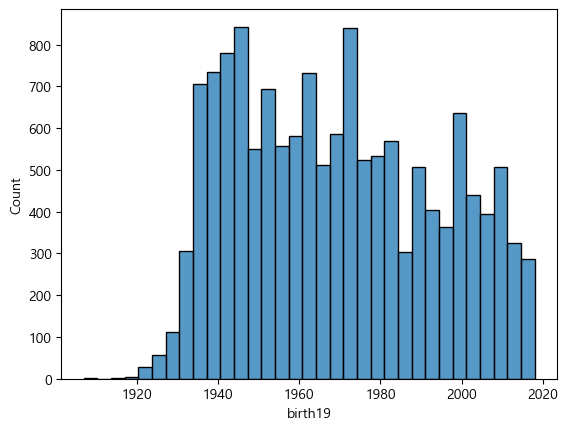

In [ ]:
# 2019년 코드 (셀 19)
sns.histplot(data=welfare_2019, x= 'birth19')


<Axes: xlabel='birth23', ylabel='Count'>

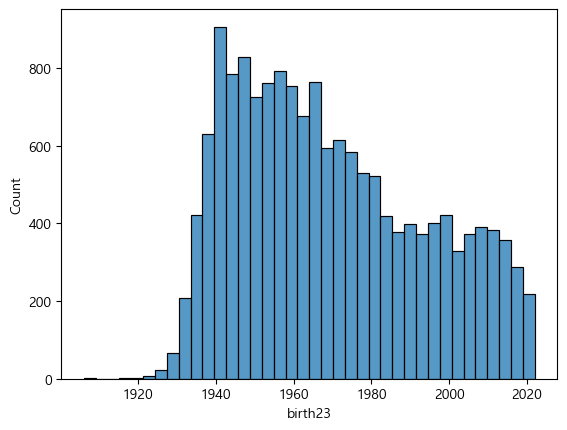

In [ ]:

# 2023년 코드 (셀 19)
sns.histplot(data=welfare_2023, x= 'birth23')

In [ ]:
# 데이터 준비
welfare_2019['Year'] = '2019'
welfare_2023['Year'] = '2023'

# 필요한 열만 선택하고 열 이름을 일치시킵니다
data_2019 = welfare_2019[['birth19', 'Year']].rename(columns={'birth19': 'Birth_Year'})
data_2023 = welfare_2023[['birth23', 'Year']].rename(columns={'birth23': 'Birth_Year'})

# 두 데이터프레임 병합
combined_df = pd.concat([data_2019, data_2023], ignore_index=True)

# 히스토그램 생성
fig = px.histogram(combined_df, x='Birth_Year', color='Year', 
                   labels={'Birth_Year': '태어난 연도', 'Year': 'Year'},
                   title='2019년과 2023년에 조회한 연도별 출생 인원수 분포',
                   barmode='overlay')

# Y축 레이블 변경
fig.update_layout(yaxis_title='인원수',title_font_size=25)

# x축 범위 설정 (최소값 1906, 최대값은 데이터에 따라 조정)
fig.update_xaxes(range=[combined_df['Birth_Year'].min(), combined_df['Birth_Year'].max()])

# 차트 표시
fig.show()

In [ ]:
# 2019년 코드 (셀 20)
# 전처리
print(welfare_2019['birth19'].describe()) #이상치 확인

# 2023년 코드 (셀 20)
# 전처리
print(welfare_2023['birth23'].describe()) #이상치 확인

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth19, dtype: float64
count    15931.000000
mean      1969.424016
std         24.226765
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2022.000000
Name: birth23, dtype: float64


In [ ]:
# 2019년 코드 (셀 21)
#결측치 확인
print(welfare_2019['birth19'].isna().sum())

# 2023년 코드 (셀 21)
#결측치 확인
print(welfare_2023['birth23'].isna().sum())

0
0


In [ ]:
# 2019년 코드 (셀 22)
# 이상치 결측 처리
welfare_2019['birth19'] =np.where(welfare_2019['birth19'] == 9999, np.nan, welfare_2019['birth19'])
# 결측치 확인
print(welfare_2019['birth19'].isna().sum())

# 2023년 코드 (셀 22)
# 이상치 결측 처리
welfare_2023['birth23'] =np.where(welfare_2023['birth23'] == 9999, np.nan, welfare_2023['birth23'])
# 결측치 확인
print(welfare_2023['birth23'].isna().sum())

0
0


In [ ]:
# 2019년 코드 (셀 23)
# assign 삽입
welfare_2019 = welfare_2019.assign(age=2019 - welfare_2019['birth19'] + 1)
welfare_2019['age'].describe()



count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [ ]:

# 2023년 코드 (셀 23)
# assign 삽입
welfare_2023=welfare_2023.assign(age= 2023 - welfare_2023['birth23'] + 1)
welfare_2023['age'].describe()


count    15931.000000
mean        54.575984
std         24.226765
min          2.000000
25%         36.000000
50%         59.000000
75%         75.000000
max        118.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

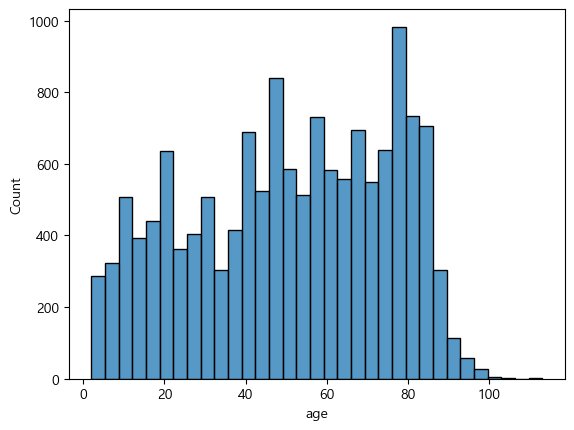

In [ ]:
# 2019년 코드 (셀 24)
sns.histplot(data=welfare_2019, x= 'age')


<Axes: xlabel='age', ylabel='Count'>

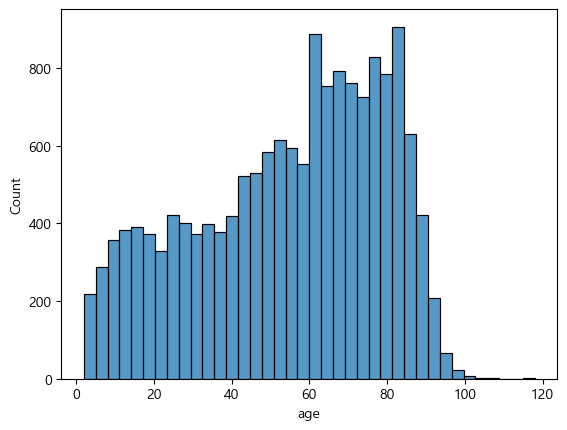

In [ ]:

# 2023년 코드 (셀 24)
sns.histplot(data=welfare_2023, x= 'age')


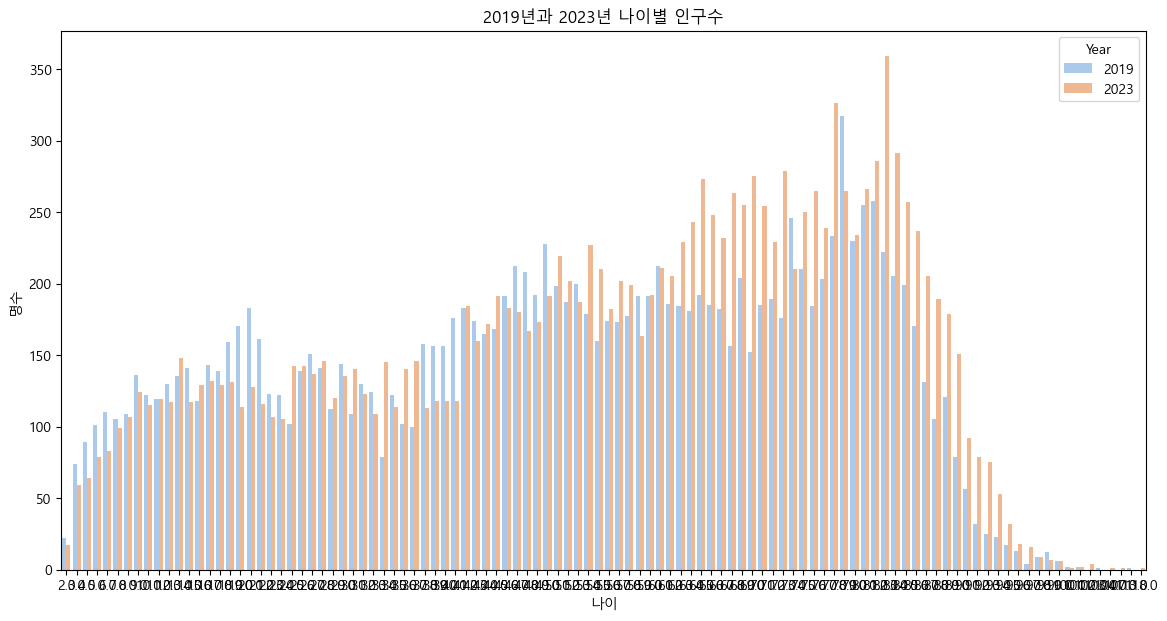

In [ ]:
# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 음수 기호 제대로 표시

# 연령대별 빈도수 집계
age_dist_2019 = welfare_2019['age'].value_counts().reset_index()
age_dist_2019.columns = ['age', 'Count']
age_dist_2019['Year'] = '2019'

age_dist_2023 = welfare_2023['age'].value_counts().reset_index()
age_dist_2023.columns = ['age', 'Count']
age_dist_2023['Year'] = '2023'

# 두 데이터프레임 병합
age_dist_combined = pd.concat([age_dist_2019, age_dist_2023], ignore_index=True)

# 정렬된 연령대 리스트 (공통된 연령대를 기준으로 정렬)
age_order = sorted(age_dist_combined['age'].unique(), key=lambda x: int(x))

# 차트 생성
plt.figure(figsize=(14, 7))
sns.barplot(data=age_dist_combined, x='age', y='Count', hue='Year', palette='pastel', order=age_order)

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년 나이별 인구수')
plt.xlabel('나이')
plt.ylabel('명수')

# 차트 표시
plt.show()

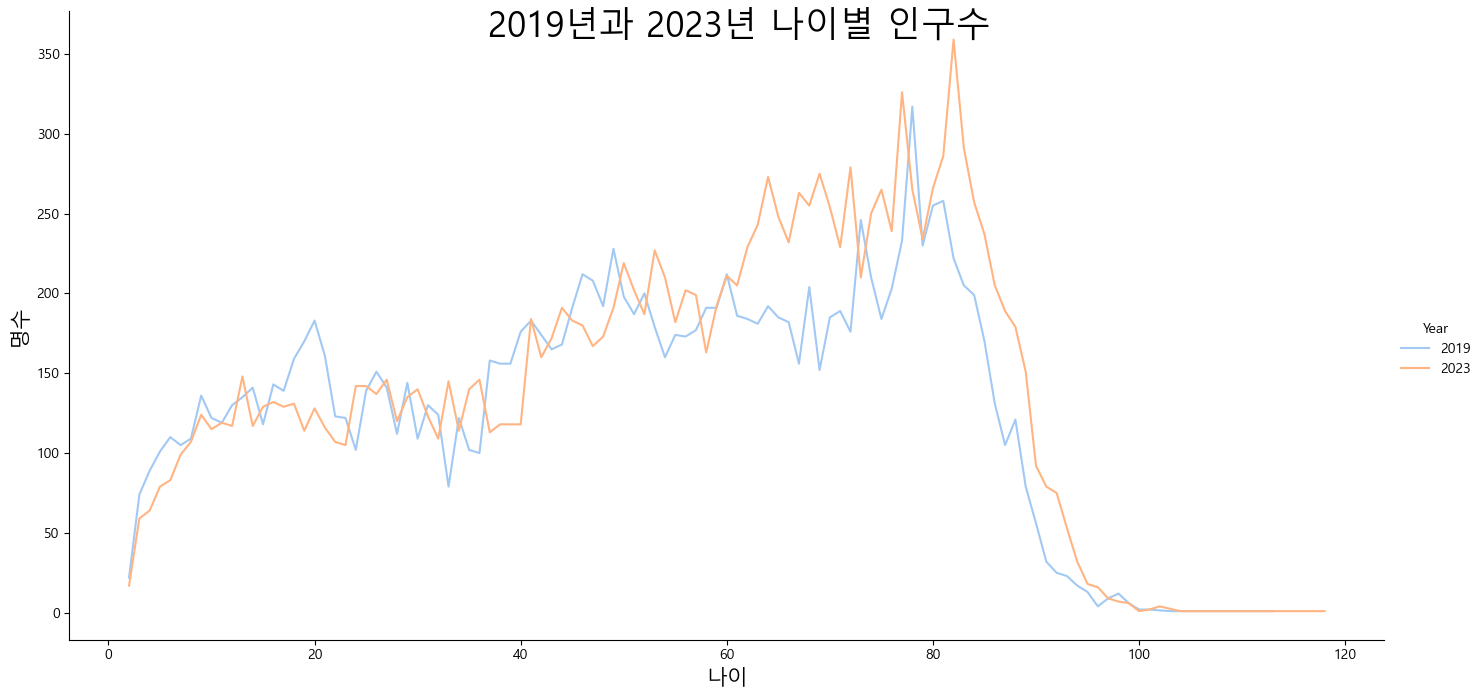

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 음수 기호 제대로 표시

# 연령대별 빈도수 집계
age_dist_2019 = welfare_2019['age'].value_counts().reset_index()
age_dist_2019.columns = ['age', 'Count']
age_dist_2019['Year'] = '2019'

age_dist_2023 = welfare_2023['age'].value_counts().reset_index()
age_dist_2023.columns = ['age', 'Count']
age_dist_2023['Year'] = '2023'

# 두 데이터프레임 병합
age_dist_combined = pd.concat([age_dist_2019, age_dist_2023], ignore_index=True)

# 정렬된 연령대 리스트 (공통된 연령대를 기준으로 정렬)
age_order = sorted(age_dist_combined['age'].unique(), key=lambda x: int(x))

# relplot 생성
g = sns.relplot(
    data=age_dist_combined,
    x='age',
    y='Count',
    hue='Year',
    kind='line',
    palette='pastel',
    height=7,
    aspect=2
)

# 차트 제목 및 레이블 설정
g.fig.suptitle('2019년과 2023년 나이별 인구수', fontsize=25)
g.set_axis_labels('나이', '명수', fontsize=15)

# 차트 표시
plt.show()


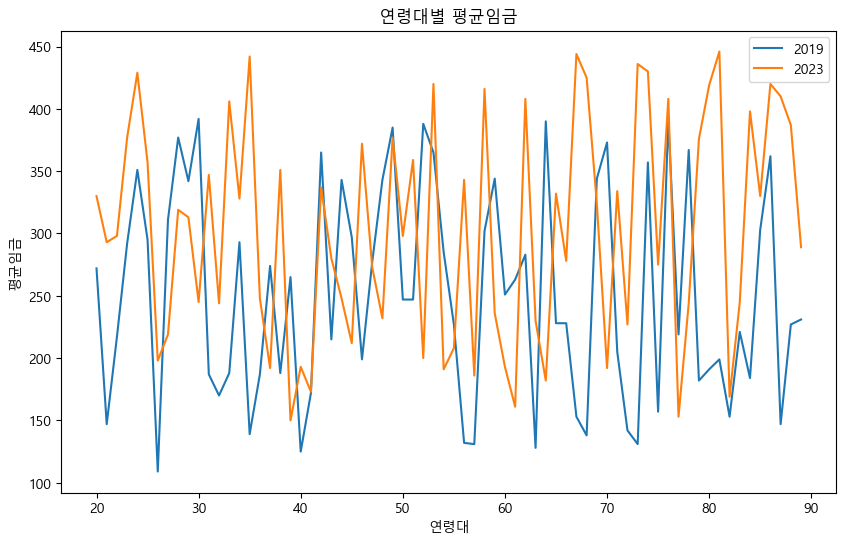

In [ ]:
np.random.seed(0)
age = np.arange(20, 90)
mean_income_2019 = np.random.randint(100, 400, size=len(age))
mean_income_2023 = np.random.randint(150, 450, size=len(age))

data_2019 = pd.DataFrame({'age': age, 'mean_income': mean_income_2019})
data_2023 = pd.DataFrame({'age': age, 'mean_income': mean_income_2023})

# 두 개의 subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 각 subplot에 lineplot 그리기
sns.lineplot(data=data_2019, x='age', y='mean_income', ax=axes, label='2019')
sns.lineplot(data=data_2023, x='age', y='mean_income', ax=axes, label='2023')

# 그래프 제목, 축 레이블 설정
axes.set_title('연령대별 평균임금')
axes.set_xlabel('연령대')
axes.set_ylabel('평균임금')

# 범례 표시
plt.legend()

plt.show()

C:\Users\04-06\AppData\Local\Temp\ipykernel_9836\4217622685.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\04-06\AppData\Local\Temp\ipykernel_9836\4217622685.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



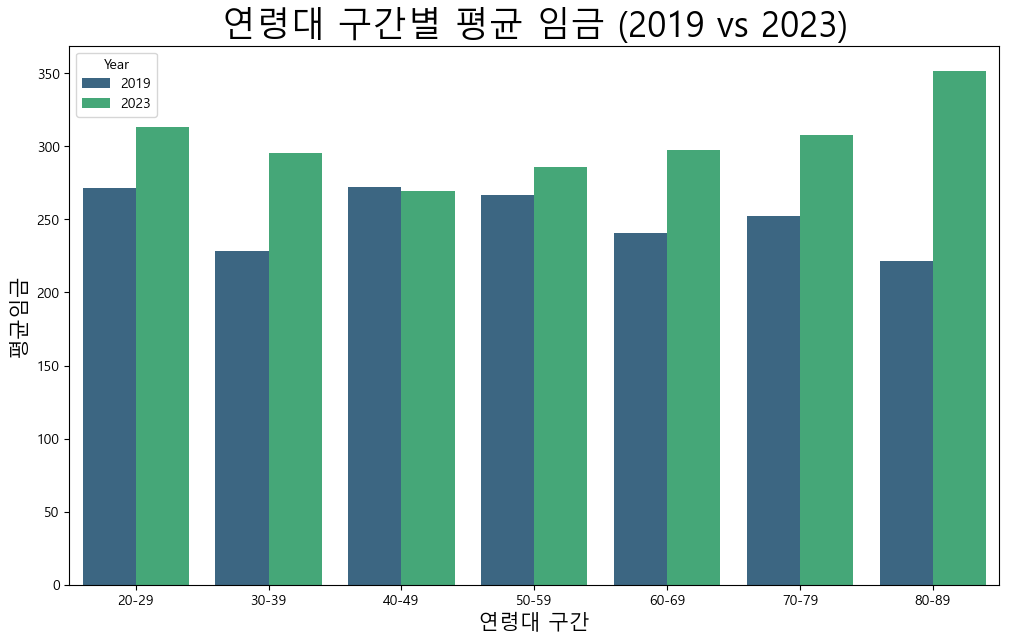

In [ ]:
# 랜덤 시드 설정
np.random.seed(0)

# 데이터 생성
age = np.arange(20, 90)
mean_income_2019 = np.random.randint(100, 400, size=len(age))
mean_income_2023 = np.random.randint(150, 450, size=len(age))

data_2019 = pd.DataFrame({'age': age, 'mean_income': mean_income_2019})
data_2023 = pd.DataFrame({'age': age, 'mean_income': mean_income_2023})

# 연령대 구간을 정의합니다 (예: 10년 단위)
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# 연령대 구간에 따라 데이터를 그룹화하고 평균 임금을 계산합니다
data_2019['age_group'] = pd.cut(data_2019['age'], bins=bins, labels=labels, right=False)
data_2023['age_group'] = pd.cut(data_2023['age'], bins=bins, labels=labels, right=False)

# 연령대 구간별 평균 임금을 계산합니다
avg_income_2019 = data_2019.groupby('age_group')['mean_income'].mean().reset_index()
avg_income_2023 = data_2023.groupby('age_group')['mean_income'].mean().reset_index()

# 데이터프레임을 통합합니다
avg_income_2019['Year'] = '2019'
avg_income_2023['Year'] = '2023'
combined_avg_income = pd.concat([avg_income_2019, avg_income_2023], ignore_index=True)

# 바 차트 생성
plt.figure(figsize=(12, 7))
sns.barplot(data=combined_avg_income, x='age_group', y='mean_income', hue='Year', palette='viridis')

# 차트 제목 및 레이블 설정
plt.title('연령대 구간별 평균 임금 (2019 vs 2023)', fontsize=25)
plt.xlabel('연령대 구간', fontsize=15)
plt.ylabel('평균임금', fontsize=15)

# 범례 표시
plt.legend(title='Year')

# 차트 표시
plt.show()

C:\Users\04-06\AppData\Local\Temp\ipykernel_9836\2124217385.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\04-06\AppData\Local\Temp\ipykernel_9836\2124217385.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



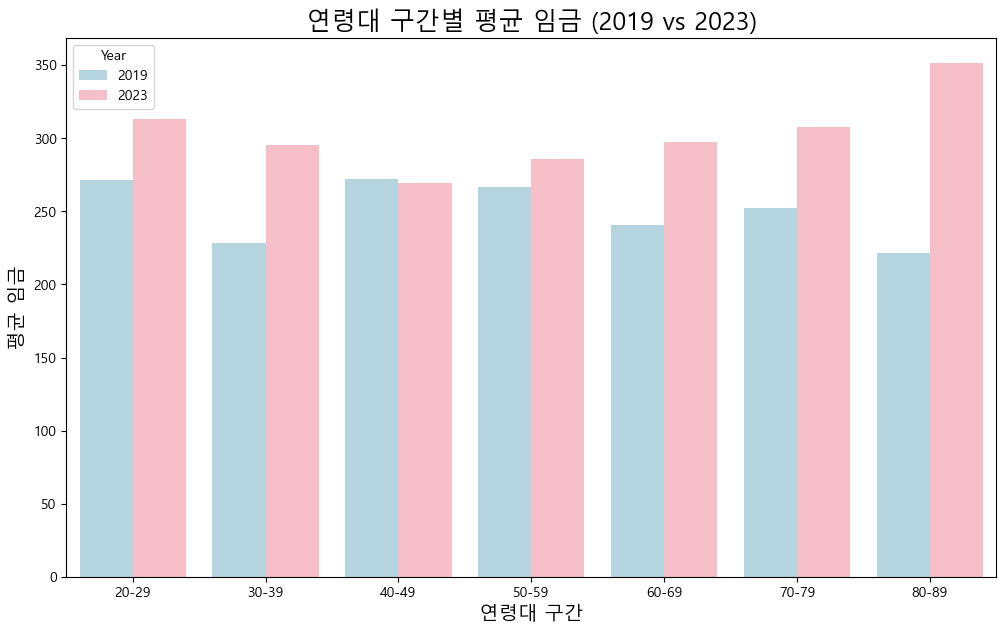

In [ ]:
# 랜덤 시드 설정
np.random.seed(0)

# 데이터 생성
age = np.arange(20, 90)
mean_income_2019 = np.random.randint(100, 400, size=len(age))
mean_income_2023 = np.random.randint(150, 450, size=len(age))

data_2019 = pd.DataFrame({'age': age, 'mean_income': mean_income_2019})
data_2023 = pd.DataFrame({'age': age, 'mean_income': mean_income_2023})

# 연령대 구간을 정의합니다 (예: 10년 단위)
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# 연령대 구간에 따라 데이터를 그룹화하고 평균 임금을 계산합니다
data_2019['age_group'] = pd.cut(data_2019['age'], bins=bins, labels=labels, right=False)
data_2023['age_group'] = pd.cut(data_2023['age'], bins=bins, labels=labels, right=False)

# 연령대 구간별 평균 임금을 계산합니다
avg_income_2019 = data_2019.groupby('age_group')['mean_income'].mean().reset_index()
avg_income_2023 = data_2023.groupby('age_group')['mean_income'].mean().reset_index()

# 데이터프레임을 통합합니다
avg_income_2019['Year'] = '2019'
avg_income_2023['Year'] = '2023'
combined_avg_income = pd.concat([avg_income_2019, avg_income_2023], ignore_index=True)

# 바 차트 생성
plt.figure(figsize=(12, 7))
sns.barplot(data=combined_avg_income, x='age_group', y='mean_income', hue='Year',
            palette={'2019': 'lightblue', '2023': 'lightpink'})

# 차트 제목 및 레이블 설정
plt.title('연령대 구간별 평균 임금 (2019 vs 2023)', fontsize=18)
plt.xlabel('연령대 구간', fontsize=14)
plt.ylabel('평균 임금', fontsize=14)

# 범례 표시
plt.legend(title='Year')

# 차트 표시
plt.show()

In [145]:
# 80~90세 구간 데이터 필터링
age_group_80_90_2019 = data_2019[data_2019['age_group'] == '80-89']
age_group_80_90_2023 = data_2023[data_2023['age_group'] == '80-89']

# 연도별 평균 임금 확인
print("2019년 80-89세 구간 데이터:")
print(age_group_80_90_2019.describe())  # 기본 통계량 확인

print("\n2023년 80-89세 구간 데이터:")
print(age_group_80_90_2023.describe())  # 기본 통계량 확인

2019년 80-89세 구간 데이터:
            age  mean_income
count  10.00000     10.00000
mean   84.50000    221.80000
std     3.02765     66.32211
min    80.00000    147.00000
25%    82.25000    185.75000
50%    84.50000    210.00000
75%    86.75000    230.00000
max    89.00000    362.00000

2023년 80-89세 구간 데이터:
            age  mean_income
count  10.00000    10.000000
mean   84.50000   351.300000
std     3.02765    90.701035
min    80.00000   169.000000
25%    82.25000   299.250000
50%    84.50000   392.500000
75%    86.75000   416.750000
max    89.00000   446.000000


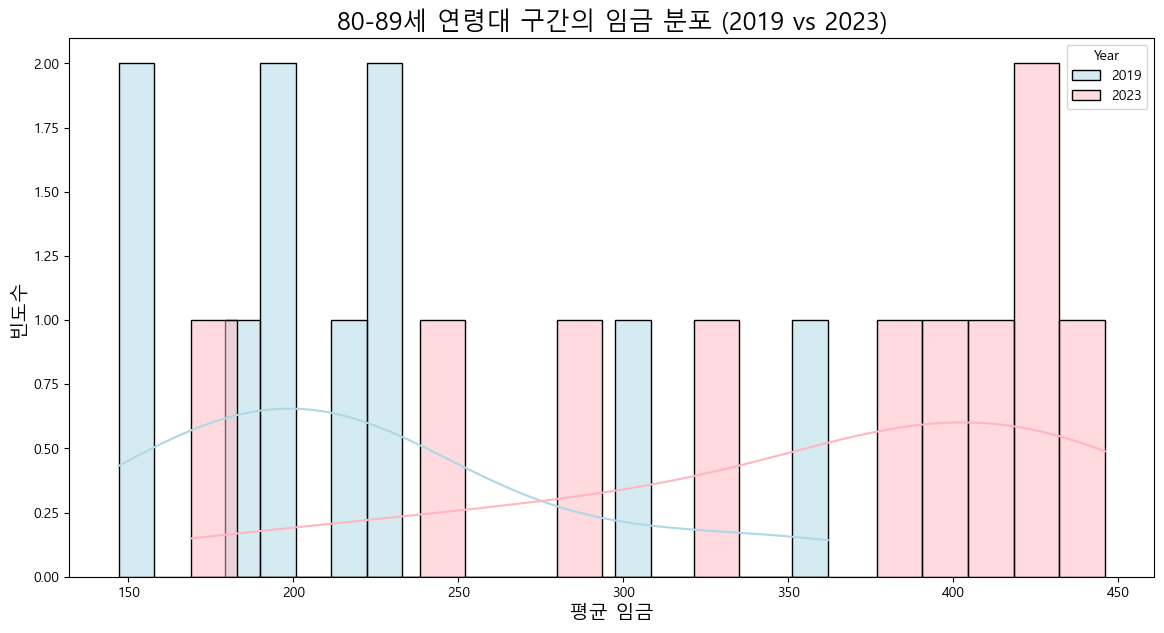

In [146]:
# 연도별로 평균 임금 분포 확인
plt.figure(figsize=(14, 7))

# 2019년 데이터 시각화
sns.histplot(age_group_80_90_2019['mean_income'], bins=20, color='lightblue', label='2019', kde=True)

# 2023년 데이터 시각화
sns.histplot(age_group_80_90_2023['mean_income'], bins=20, color='lightpink', label='2023', kde=True)

# 그래프 제목 및 레이블 설정
plt.title('80-89세 연령대 구간의 임금 분포 (2019 vs 2023)', fontsize=18)
plt.xlabel('평균 임금', fontsize=14)
plt.ylabel('빈도수', fontsize=14)

# 범례 표시
plt.legend(title='Year')

# 차트 표시
plt.show()


In [ ]:
# 2019년 코드 (셀 25)
#나이별 월급 평균
age_income_2019 = welfare_2019.dropna(subset=['income19']) \
                   .groupby('age') \
                   .agg(mean_income = ('income19','mean'))
age_income_2019


,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


In [ ]:

# 2023년 코드 (셀 25)
#나이별 월급 평균
age_income_2023 =welfare_2023.dropna(subset=['income23']) \
                   .groupby('age') \
                   .agg(mean_income = ('income23','mean'))
age_income_2023

,mean_income
age,
20.0,197.000000
21.0,186.500000
22.0,125.560000
23.0,138.800000
24.0,185.067797
...,...
91.0,27.000000
92.0,27.000000
93.0,28.000000


<Axes: xlabel='age', ylabel='mean_income'>

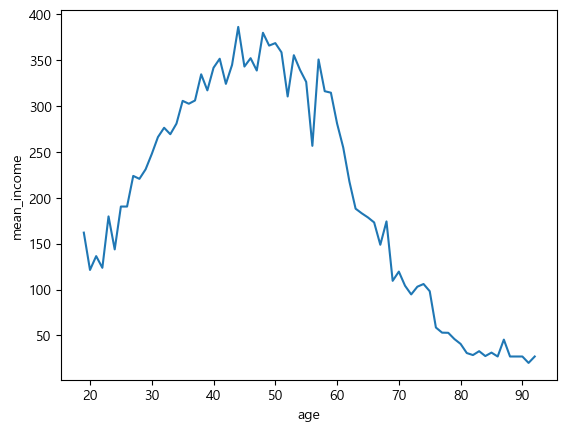

In [ ]:
# 2019년 코드 (셀 26)
sns.lineplot(data=age_income_2019, x='age' ,y='mean_income')


<Axes: xlabel='age', ylabel='mean_income'>

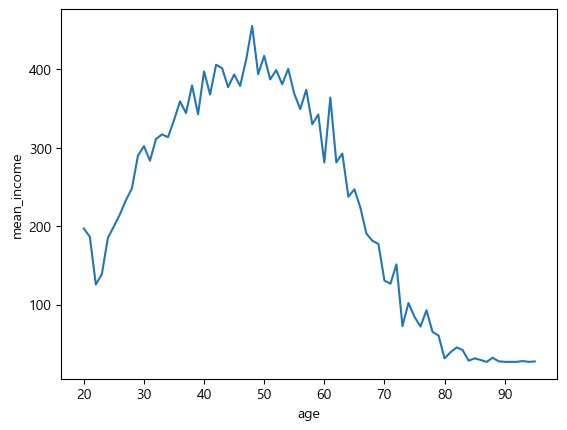

In [ ]:

# 2023년 코드 (셀 26)
sns.lineplot(data=age_income_2023, x='age' ,y='mean_income')

In [ ]:
# 2019년 코드 (셀 27)
# 연령대에 따른 임금 차이
# 초년층 : 30세미만
# 중년층 : 30~59세
# 노년층 : 60세 이상


# 나이 변수 확인
welfare_2019['age'].head()


0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [ ]:

# 2023년 코드 (셀 27)
# 연령대에 따른 임금 차이
# 초년층 : 30세미만
# 중년층 : 30~59세
# 노년층 : 60세 이상


# 나이 변수 확인
welfare_2023['age'].head()

0    79.0
1    76.0
2    82.0
3    62.0
4    61.0
Name: age, dtype: float64

In [ ]:
# 2019년 코드 (셀 28)
welfare_2019 =welfare_2019.assign(ageg = np.where(welfare_2019['age'] <  30, 'young',
                               np.where(welfare_2019['age'] <= 59, 'middle','old')))

welfare_2019['ageg'].value_counts()


ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

In [ ]:

# 2023년 코드 (셀 28)
welfare_2023 =welfare_2023.assign(ageg = np.where(welfare_2023['age'] <  30, 'young',
                               np.where(welfare_2023['age'] <= 59, 'middle','old')))

welfare_2023['ageg'].value_counts()

ageg
old       7802
middle    4968
young     3161
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

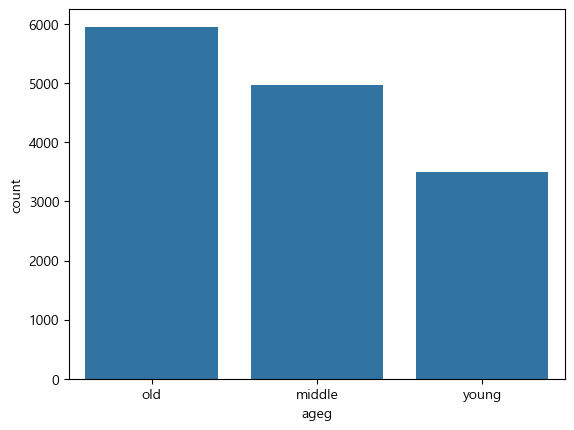

In [ ]:
# 2019년 코드 (셀 29)
# 빈도 그래프
sns.countplot(data=welfare_2019, x='ageg')


<Axes: xlabel='ageg', ylabel='count'>

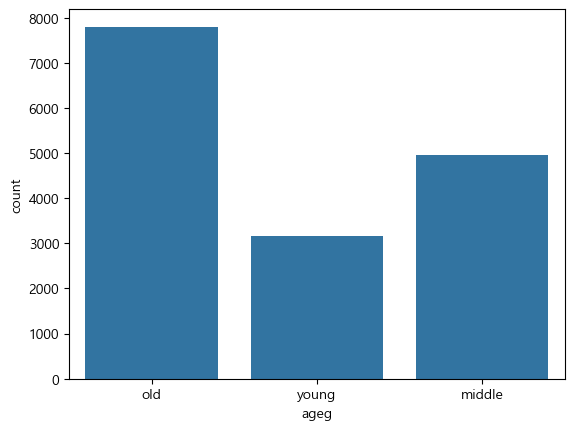

In [ ]:

# 2023년 코드 (셀 29)
# 빈도 그래프
sns.countplot(data=welfare_2023, x='ageg')

In [ ]:
# 2019년 코드 (셀 30)
# 연령대별로 월급차이
# 연령대별로 월급평균
ageg_income_2019 = welfare_2019.dropna(subset=['income19']) \
                    .groupby('ageg',as_index=False) \
                    .agg(mean_income=('income19','mean'))
ageg_income_2019


,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


In [ ]:

# 2023년 코드 (셀 30)
# 연령대별로 월급차이
# 연령대별로 월급평균
ageg_income_2023 = welfare_2023.dropna(subset=['income23']) \
                    .groupby('ageg',as_index=False) \
                    .agg(mean_income=('income23','mean'))
ageg_income_2023

,ageg,mean_income
0,middle,371.231376
1,old,159.485640
2,young,219.460695


<Axes: xlabel='ageg', ylabel='mean_income'>

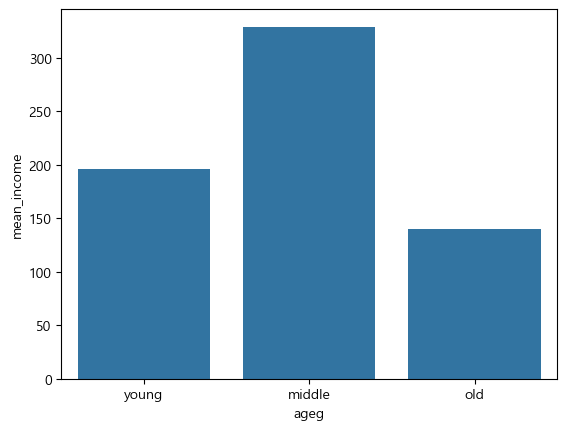

In [ ]:
# 2019년 코드 (셀 31)
# 시각화 -막대 그래프 #정렬전
sns.barplot(data=ageg_income_2019,x='ageg',y='mean_income',
            order=['young', 'middle','old'])


<Axes: xlabel='ageg', ylabel='mean_income'>

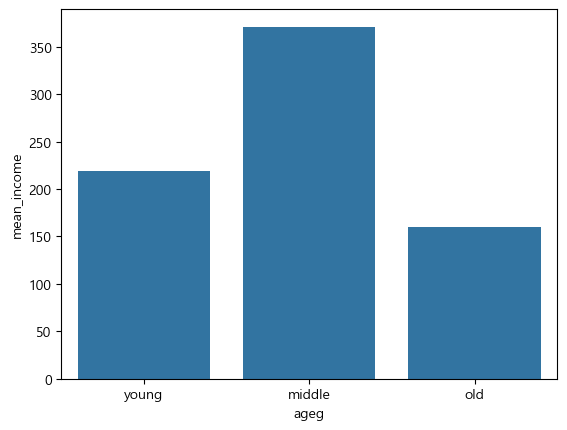

In [ ]:

# 2023년 코드 (셀 31)
# 시각화 -막대 그래프 #정렬전
sns.barplot(data=ageg_income_2023,x='ageg',y='mean_income',
            order=['young', 'middle','old'])

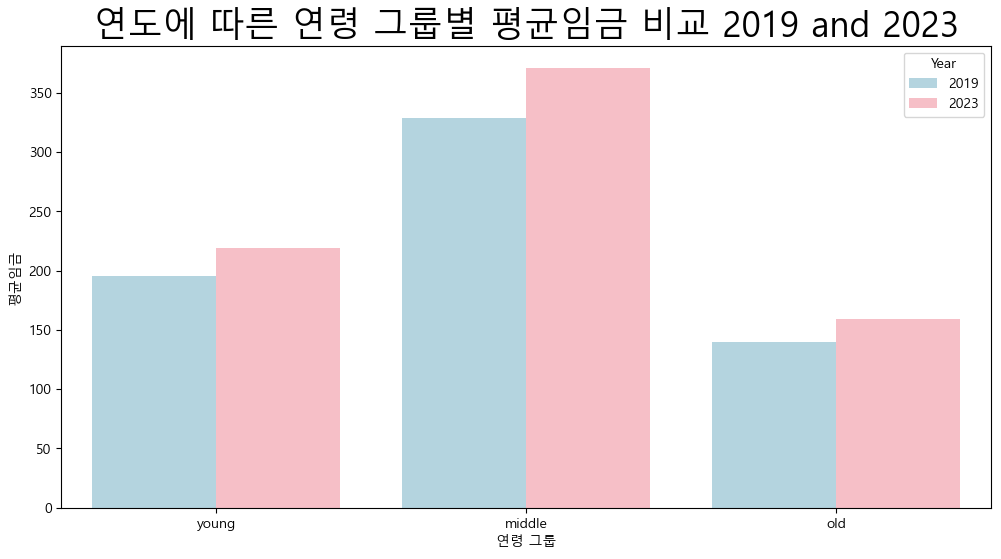

In [ ]:
# 2019년과 2023년 데이터 결합
ageg_income_2019['Year'] = '2019'
ageg_income_2023['Year'] = '2023'

# 데이터 결합
comparison_df = pd.concat([ageg_income_2019, ageg_income_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='ageg', y='mean_income', hue='Year', palette={'2019': 'lightblue', '2023': 'lightpink'}, order=['young', 'middle', 'old'])

# 차트 제목 및 레이블 설정
plt.title('연도에 따른 연령 그룹별 평균임금 비교 2019 and 2023', fontsize = 25)
plt.xlabel('연령 그룹')
plt.ylabel('평균임금')

# 차트 표시
plt.show()

### 연령대 및 성별

In [ ]:
# 2019년 코드 (셀 33)
# 연령대 및 성별 평균
sex_income_2019 = welfare_2019.dropna(subset=['income19']) \
                    .groupby(['ageg','sex19'],as_index=False) \
                    .agg(mean_income=('income19','mean'))
sex_income_2019


,ageg,sex19,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


In [ ]:

# 2023년 코드 (셀 33)
# 연령대 및 성별 평균
sex_income_2023 = welfare_2023.dropna(subset=['income23']) \
                    .groupby(['ageg','sex23'],as_index=False) \
                    .agg(mean_income=('income23','mean'))
sex_income_2023

,ageg,sex23,mean_income
0,middle,female,273.453081
1,middle,male,451.477011
2,old,female,105.080519
3,old,male,242.167105
4,young,female,218.178914
5,young,male,221.175214


<Axes: xlabel='ageg', ylabel='mean_income'>

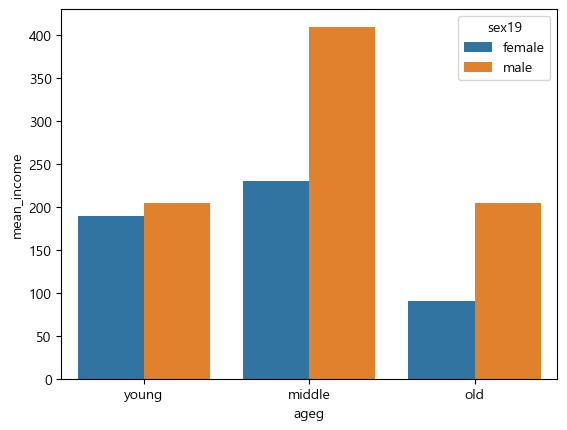

In [ ]:
# 2019년 코드 (셀 34)
# 연령대 및 성별 월급 시각화 # hue <<이거 공부해
sns.barplot(data=sex_income_2019,x='ageg',y='mean_income', hue='sex19',
            order=['young', 'middle','old'])


<Axes: xlabel='ageg', ylabel='mean_income'>

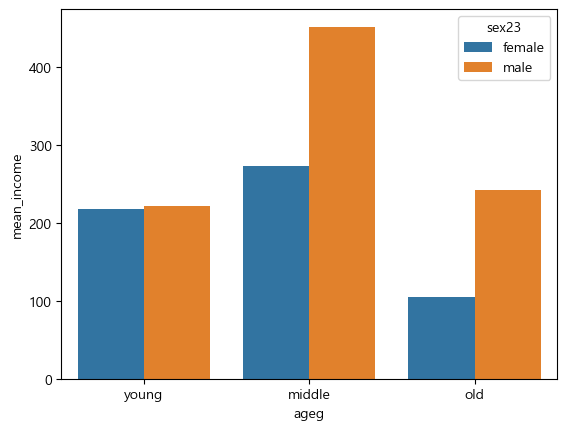

In [ ]:

# 2023년 코드 (셀 34)
# 연령대 및 성별 월급 시각화 # hue <<이거 공부해
sns.barplot(data=sex_income_2023,x='ageg',y='mean_income', hue='sex23',
            order=['young', 'middle','old'])

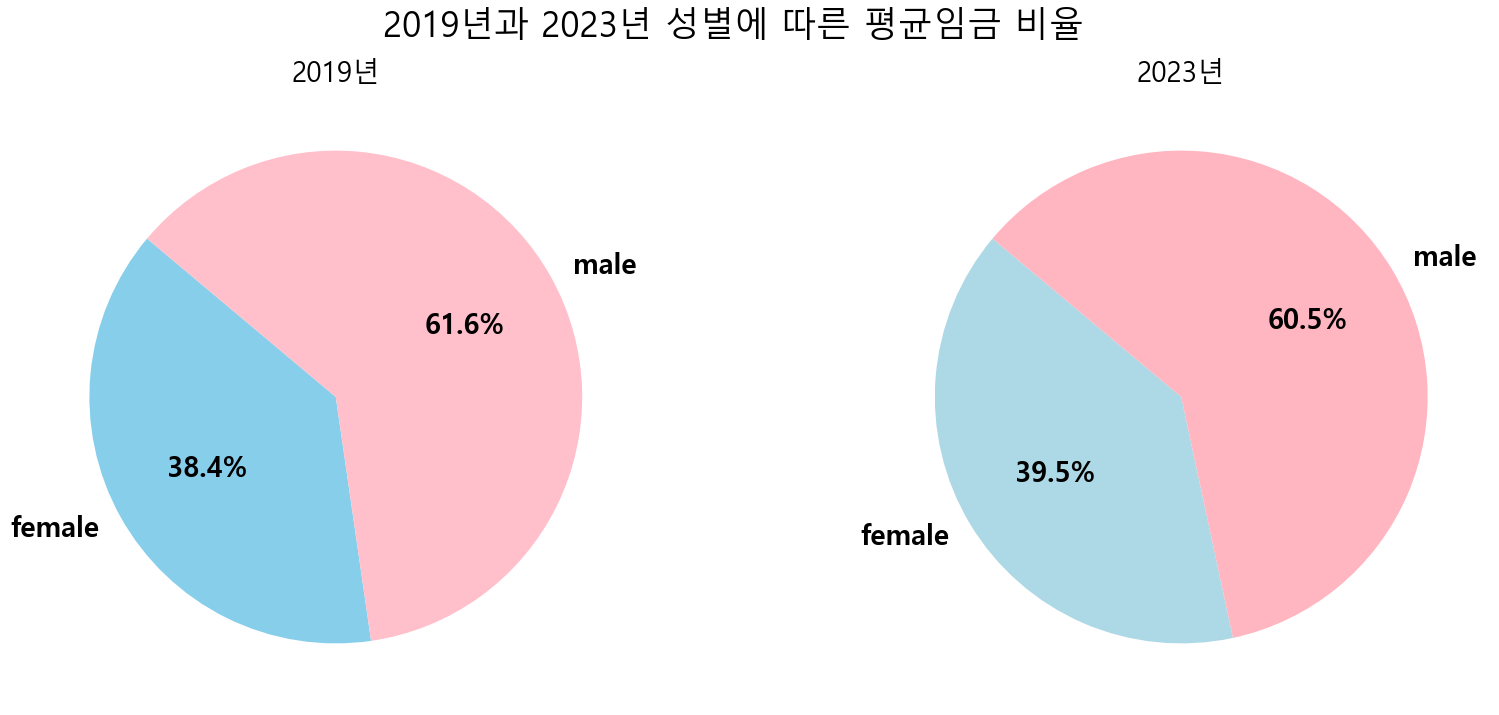

In [ ]:
# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 음수 기호 제대로 표시


# 2019년 성별별 평균 수입 집계
sex_income_2019_summary = sex_income_2019.groupby('sex19')['mean_income'].sum().reset_index()
sex_income_2019_summary.columns = ['Sex', 'Mean_Income']
sex_income_2019_summary['Year'] = '2019'

# 2023년 성별별 평균 수입 집계
sex_income_2023_summary = sex_income_2023.groupby('sex23')['mean_income'].sum().reset_index()
sex_income_2023_summary.columns = ['Sex', 'Mean_Income']
sex_income_2023_summary['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([sex_income_2019_summary, sex_income_2023_summary], ignore_index=True)

# 파이차트 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8))


# 2019년 파이차트
axes[0].pie(sex_income_2019_summary['Mean_Income'],
            labels=sex_income_2019_summary['Sex'],
            autopct='%1.1f%%',
            colors=['skyblue', 'pink'],  # 필요에 따라 색상 조정
            startangle=140, textprops={'fontsize': 20, 'fontweight':'bold'})
axes[0].set_title('2019년', fontsize=20)

# 2023년 파이차트
axes[1].pie(sex_income_2023_summary['Mean_Income'],
            labels=sex_income_2023_summary['Sex'],
            autopct='%1.1f%%',
            colors=['lightblue', 'lightpink'],  # 필요에 따라 색상 조정
            startangle=140, textprops={'fontsize': 20, 'fontweight':'bold'})
axes[1].set_title('2023년', fontsize=20)

# 전체 제목 및 그리드 추가
plt.suptitle('2019년과 2023년 성별에 따른 평균임금 비율', fontsize=25)
plt.grid(True)  # 그리드 추가

# 차트 표시
plt.show()

In [ ]:
# 2019년 코드 (셀 35)
#나이 및 성별 평균값
sex_age_2019 =welfare_2019.dropna(subset=['income19']) \
                .groupby(['age','sex19'],as_index=False) \
                .agg(mean_income=('income19','mean'))

sex_age_2019.head()


,age,sex19,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


In [ ]:

# 2023년 코드 (셀 35)
#나이 및 성별 평균값
sex_age_2023 =welfare_2023.dropna(subset=['income23']) \
                .groupby(['age','sex23'],as_index=False) \
                .agg(mean_income=('income23','mean'))

sex_age_2023.head()

,age,sex23,mean_income
0,20.0,male,197.000000
1,21.0,female,197.454545
2,21.0,male,169.285714
3,22.0,female,85.181818
4,22.0,male,157.285714


<Axes: xlabel='age', ylabel='mean_income'>

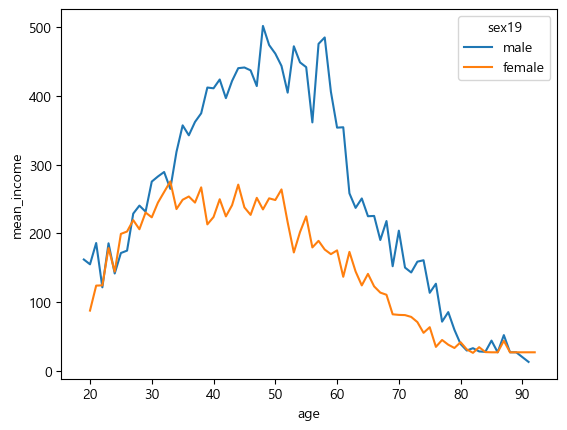

In [ ]:
# 2019년 코드 (셀 36)
# 성별 평균 급여 차이
sns.lineplot(data= sex_age_2019, x= 'age',y='mean_income',hue='sex19')


<Axes: xlabel='age', ylabel='mean_income'>

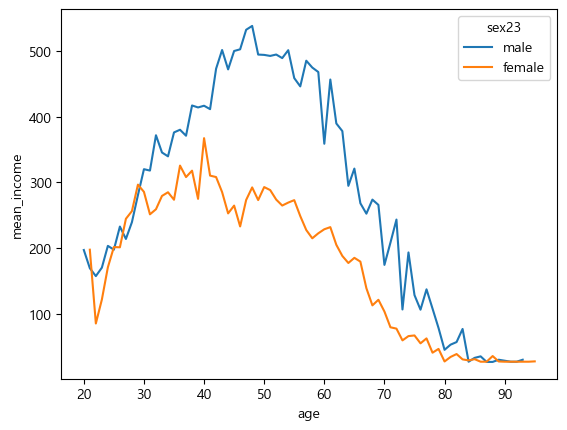

In [ ]:

# 2023년 코드 (셀 36)
# 성별 평균 급여 차이
sns.lineplot(data= sex_age_2023, x= 'age',y='mean_income',hue='sex23')

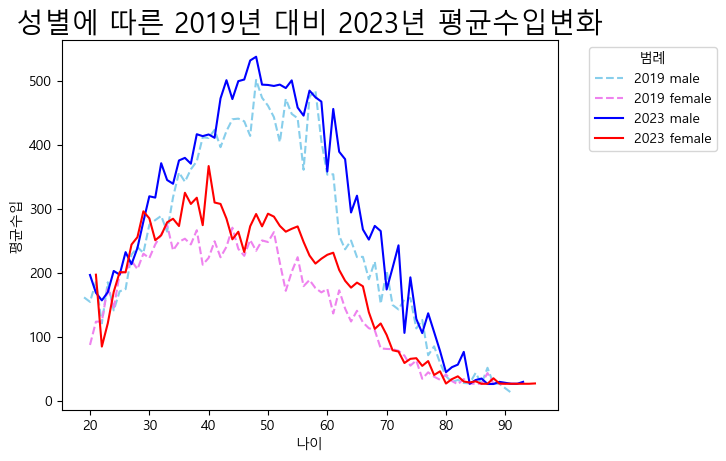

In [ ]:
# 2019년 데이터의 선 스타일을 점선으로 설정
sns.lineplot(data=sex_age_2019, x='age', y='mean_income', hue='sex19',
             linestyle='--', palette={'male': 'skyblue', 'female': 'violet'}, legend=False)

# 2023년 데이터의 선 스타일을 실선으로 설정
sns.lineplot(data=sex_age_2023, x='age', y='mean_income', hue='sex23',
             linestyle='-', palette={'male': 'blue', 'female': 'red'}, legend=False)

# 범례 핸들 생성
legend_handles = [
    mlines.Line2D([], [], color='skyblue', linestyle='--', label='2019 male'),
    mlines.Line2D([], [], color='violet', linestyle='--', label='2019 female'),
    mlines.Line2D([], [], color='blue', linestyle='-', label='2023 male'),
    mlines.Line2D([], [], color='red', linestyle='-', label='2023 female')
]

# 범례 추가
plt.legend(handles=legend_handles, title='범례', loc='upper left', bbox_to_anchor=(1.05, 1))

# 그래프 제목 및 레이블 설정
plt.title('성별에 따른 2019년 대비 2023년 평균수입변화', fontsize = 20)
plt.xlabel('나이')
plt.ylabel('평균수입')

# 그래프 표시
plt.show()

### 직업별 월급차이

In [ ]:
# 2019년 코드 (셀 38)
#직업 열 속성
welfare_2019['code_job19'].dtype


dtype('float64')

In [ ]:

# 2023년 코드 (셀 38)
#직업 열 속성
welfare_2023['code_job23'].dtype

dtype('float64')

In [ ]:
# 2019년 코드 (셀 39)
# 잡코드 빈도 수
print(welfare_2019['code_job19'].value_counts)

# 2023년 코드 (셀 39)
# 잡코드 빈도 수
print(welfare_2023['code_job23'].value_counts)

<bound method IndexOpsMixin.value_counts of 0          NaN
1          NaN
2        762.0
3        855.0
4          NaN
         ...  
14413      NaN
14414      NaN
14415    910.0
14416    246.0
14417      NaN
Name: code_job19, Length: 14418, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0          NaN
1        942.0
2        952.0
3        855.0
4          NaN
         ...  
15926    222.0
15927      NaN
15928      NaN
15929    248.0
15930      NaN
Name: code_job23, Length: 15931, dtype: float64>


In [ ]:
# 2019년 코드 (셀 40)
# 잡코드의 직종 # 엑셀안 시트를 불러오는 코드
list_job_2019= pd.read_excel("D:/KNY_data/과제/Koweps_Codebook_2019.xlsx",sheet_name='직종코드')
list_job_2019.head()


,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [ ]:
list_job_2019 = list_job_2019.rename(columns={'code_job': 'code_job19'})
list_job_2019.head()

,code_job19,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [ ]:

# 2023년 코드 (셀 40)
# 잡코드의 직종 # 엑셀안 시트를 불러오는 코드
list_job_2023= pd.read_excel("D:/KNY_data/과제/2023 data/Koweps_Codebook_2023.xlsx",sheet_name='직종코드')
list_job_2023 = list_job_2023.rename(columns={'code_job': 'code_job23'})
list_job_2023.head()

,code_job23,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [ ]:
# 2019년 코드 (셀 41)
list_job_2019.shape # 직업군 종류


(156, 2)

In [ ]:

# 2023년 코드 (셀 41)
list_job_2023.shape # 직업군 종류

(156, 2)

In [ ]:
# 2019년 코드 (셀 42)
# welfare_2019 에  list_job 결합하기
welfare_2019 = welfare_2019.merge(list_job_2019, how='left', on='code_job19')



In [ ]:

# 2023년 코드 (셀 42)
# welfare_2023 에  list_job 결합하기
welfare_2023 = welfare_2023.merge(list_job_2023,how='left',on= 'code_job23')

In [ ]:
# 2019년 코드 (셀 43)
# code_job 결측지 제거하고 code_job , job 출력
welfare_2019.dropna(subset=['code_job19'])[['code_job19','job']].head()


,code_job19,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [ ]:

# 2023년 코드 (셀 43)
# code_job 결측지 제거하고 code_job , job 출력
welfare_2023.dropna(subset=['code_job23'])[['code_job23','job']].head()

,code_job23,job
1,942.0,건물 관리원 및 검표원
2,952.0,음식 관련 단순 종사자
3,855.0,금속기계 부품 조립원
8,941.0,청소원 및 환경미화원
9,151.0,판매 및 운송 관리자


In [ ]:
# 2019년 코드 (셀 44)
# 직업별 월급 평균
# 1.job ,income 결측지 제거
# 2.job 분리
# 3.income 평균
job_income_2019 = welfare_2019.dropna(subset=['code_job19','income19']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('income19','mean'))
job_income_2019.head()


,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [ ]:

# 2023년 코드 (셀 44)
# 직업별 월급 평균
# 1.job ,income 결측지 제거
# 2.job 분리
# 3.income 평균
job_income_2023 = welfare_2023.dropna(subset=['income23','income23']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('income23','mean'))
job_income_2023.head()

,job,mean_income
0,가사 및 육아 도우미,90.926471
1,간호사,317.101449
2,감정∙기술영업및중개관련종사자,387.250000
3,건물 관리원 및 검표원,206.913043
4,건설 및 광업 단순 종사자,289.859649


In [ ]:
# 2019년 코드 (셀 45)
# 상위 10위 추출
top10_2019 = job_income_2019.sort_values('mean_income',ascending=False).head(10)
top10_2019



,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [ ]:

# 2023년 코드 (셀 45)
# 상위 10위 추출
top10_2023 = job_income_2023.sort_values('mean_income',ascending=False).head(10)
top10_2023


,job,mean_income
97,의료 진료 전문가,800.833333
101,인사 및 경영 전문가,760.333333
147,화학공학 기술자 및 시험원,729.200000
132,컴퓨터 하드웨어 및 통신공학 전문가,725.800000
128,철도운송 관련 종사자,698.000000
59,법률 전문가,695.000000
26,기업 고위 임원,691.666667
142,행정 및 경영 지원 관리자,690.000000
109,장교,687.750000
62,보험 및 금융 관리자,681.200000


In [ ]:
# 2019년 코드 (셀 46)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : "Malgun Gothic"})

# 2023년 코드 (셀 46)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : "Malgun Gothic"})

<Axes: xlabel='mean_income', ylabel='job'>

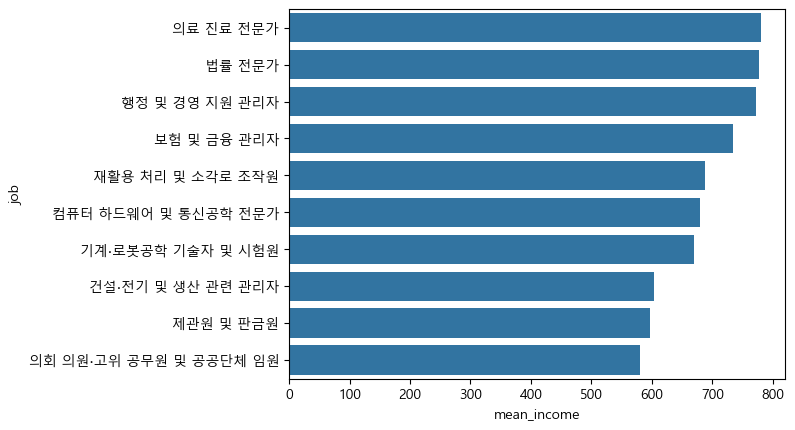

In [ ]:
# 2019년 코드 (셀 47)
# 위에 데이터 내용을 시각화
sns.barplot(data= top10_2019, y='job',x='mean_income' )


<Axes: xlabel='mean_income', ylabel='job'>

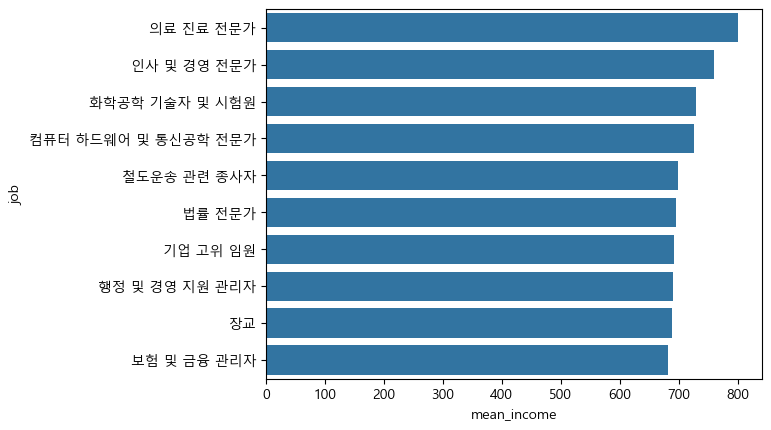

In [ ]:

# 2023년 코드 (셀 47)
# 위에 데이터 내용을 시각화
sns.barplot(data= top10_2023, y='job',x='mean_income' )

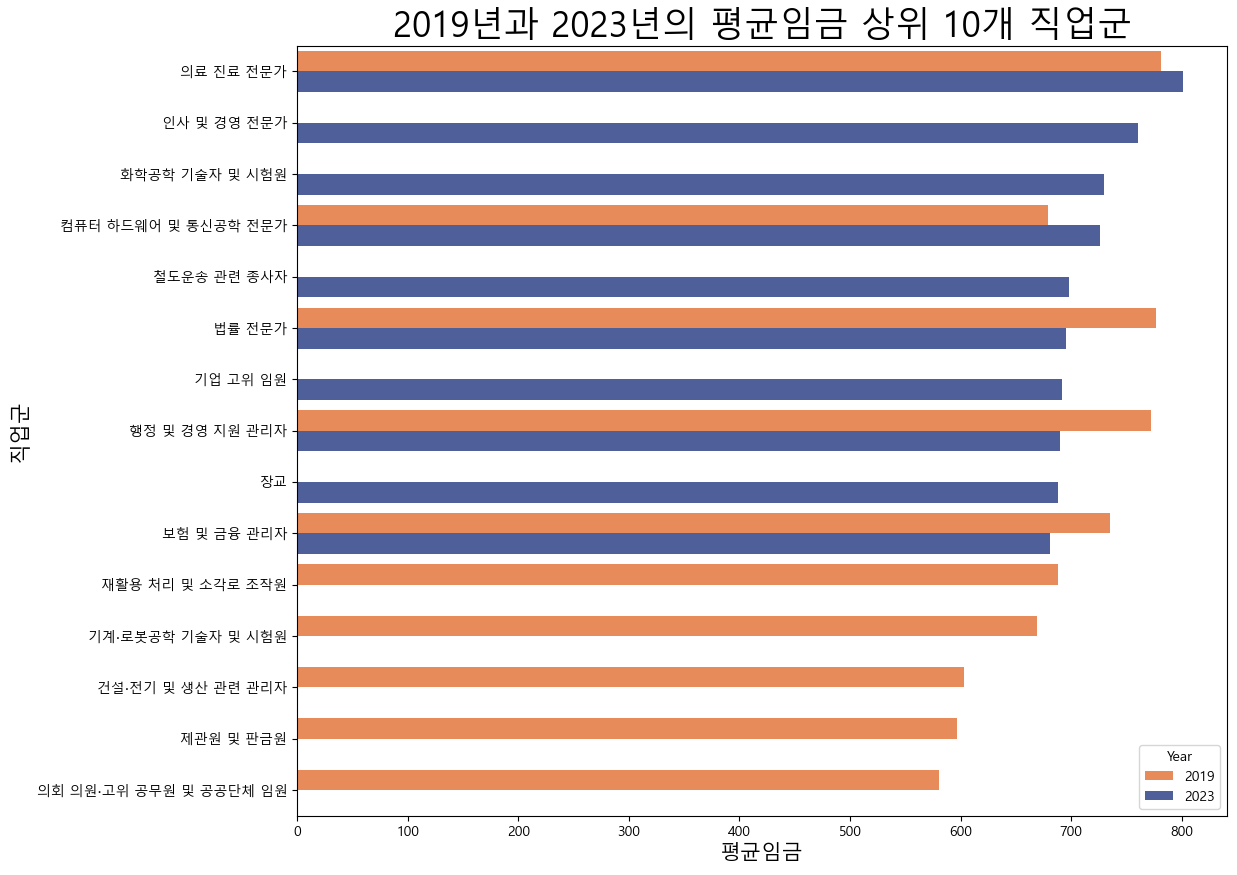

In [ ]:

# 데이터 준비 (예시로 top10_2019와 top10_2023 데이터프레임이 있다고 가정)
top10_2019['year'] = 2019
top10_2023['year'] = 2023

# 두 데이터프레임을 하나로 결합
combined_data = pd.concat([top10_2023, top10_2019])

# 색상 설정
palette = {2023: '#4158A6', 2019: '#FF8343'}

# 시각화
plt.figure(figsize=(12, 10))
sns.barplot(data=combined_data, y='job', x='mean_income', hue='year', palette=palette)

# 그래프 타이틀과 레이블 설정
plt.title('2019년과 2023년의 평균임금 상위 10개 직업군', fontsize = 25)
plt.xlabel('평균임금', fontsize = 15)
plt.ylabel('직업군', fontsize = 15)

# 범례 위치 조정
plt.legend(title='Year')

plt.show()


In [ ]:
# 2019년 코드 (셀 48)
# 하위 10위 추출
bottom10_2019 =job_income_2019.sort_values('mean_income').head(10)
bottom10_2019


,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


In [ ]:

# 2023년 코드 (셀 48)
# 하위 10위 추출
bottom10_2023 =job_income_2023.sort_values('mean_income').head(10)
bottom10_2023

,job,mean_income
129,청소원 및 환경미화원,76.252322
33,기타 서비스 관련 단순 종사자,77.402439
0,가사 및 육아 도우미,90.926471
32,기타 돌봄∙보건 및 개인 생활 서비스 종사자,109.212121
96,음식 관련 단순 종사자,115.238806
42,돌봄 및 보건 서비스 종사자,141.383929
148,환경∙청소 및 경비 관련 관리자,149.861111
38,농림∙어업 관련 단순 종사자,151.368421
140,학예사∙사서 및 기록물 관리사,168.000000
78,식음료 서비스 종사자,171.240000


[(0.0, 800.0)]

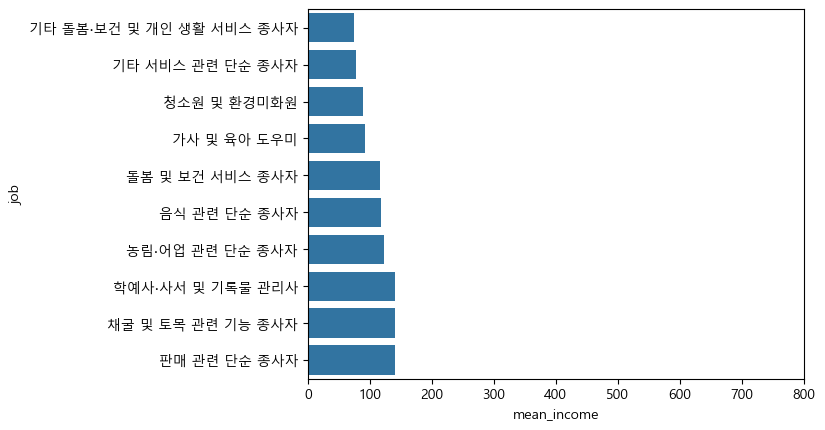

In [ ]:
# 2019년 코드 (셀 49)
sns.barplot(data= bottom10_2019, y='job',x='mean_income').set(xlim= (0,800))


[(0.0, 800.0)]

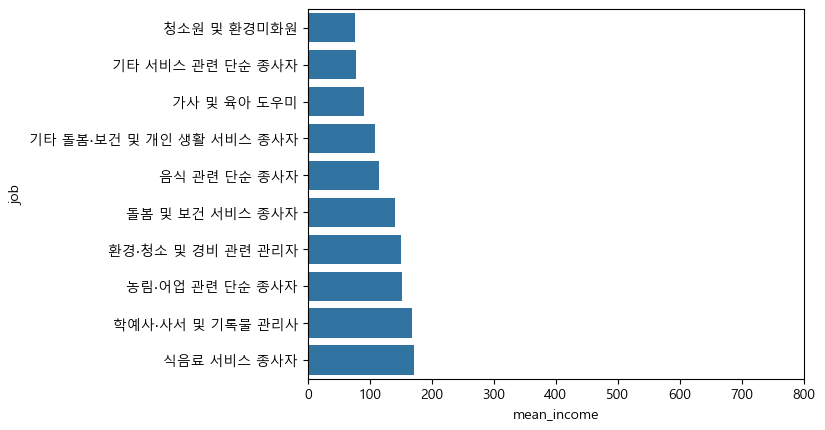

In [ ]:

# 2023년 코드 (셀 49)
sns.barplot(data= bottom10_2023, y='job',x='mean_income').set(xlim= (0,800))

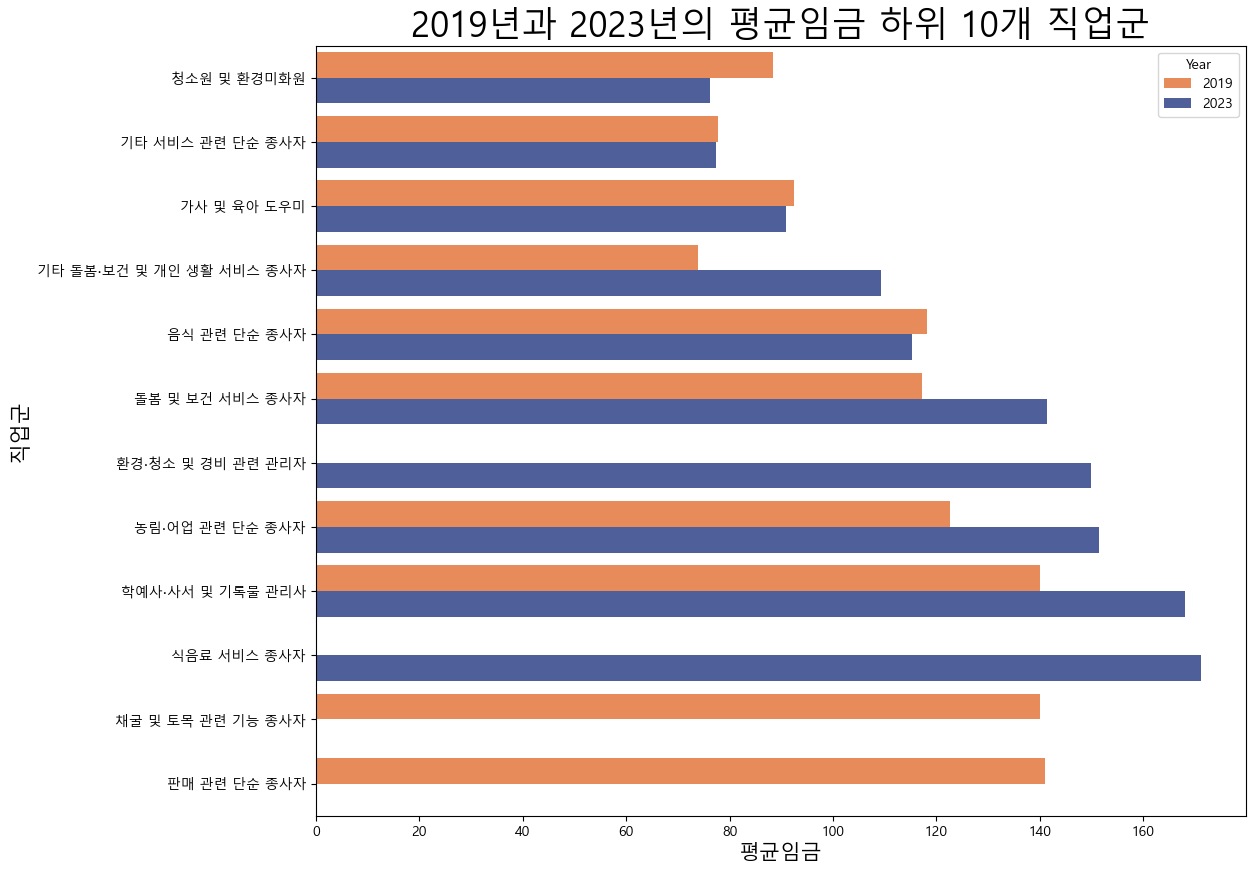

In [ ]:

# 데이터 준비 (예시로 top10_2019와 top10_2023 데이터프레임이 있다고 가정)
bottom10_2019['year'] = 2019
bottom10_2023['year'] = 2023

# 두 데이터프레임을 하나로 결합
combined_data = pd.concat([bottom10_2023, bottom10_2019])

# 색상 설정
palette = {2023: '#4158A6', 2019: '#FF8343'}

# 시각화
plt.figure(figsize=(12, 10))
sns.barplot(data=combined_data, y='job', x='mean_income', hue='year', palette=palette)

# 그래프 타이틀과 레이블 설정
plt.title('2019년과 2023년의 평균임금 하위 10개 직업군', fontsize = 25)
plt.xlabel('평균임금', fontsize = 15)
plt.ylabel('직업군', fontsize = 15)

# 범례 위치 조정
plt.legend(title='Year')

plt.show()


### 성별 직업 빈도

In [ ]:
print(welfare_2019.head)


<bound method NDFrame.head of        h14_id  h14_ind  h14_sn  h14_merkey  h_new  h14_cobf   p14_wsc  \
0         2.0      1.0     1.0     20101.0    0.0       NaN  0.291589   
1         3.0      1.0     1.0     30101.0    0.0       NaN  0.419753   
2         4.0      1.0     1.0     40101.0    0.0       NaN  0.265263   
3         6.0      1.0     1.0     60101.0    0.0       NaN  0.494906   
4         6.0      1.0     1.0     60101.0    0.0       NaN  1.017935   
...       ...      ...     ...         ...    ...       ...       ...   
14413  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14414  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14415  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14416  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14417  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   

        p14_wsl      p14_wgc      p14_wgl  ...  wc14_5aq6  h14_pers_income1  \
0      0.29158

In [ ]:
# # 남성 직업 빈도 상위 10개 추출
# # 1. 결측치 제거
# filtered_data = welfare_2019.dropna(subset=['job', 'sex19'])

# # 2. Boolean 인덱싱을 사용하여 성별이 'male'인 데이터 필터링
# filtered_data = filtered_data[filtered_data['sex19'] == 'male']

# # 3. 직업별 빈도 계산
# job_male_2019 = (
#     filtered_data
#     .groupby('job', as_index=False)
#     .agg(n=('job', 'count'))
#     .sort_values('n', ascending=False)
#     .head(10)
# )

# job_male_2019

In [ ]:
# 2019년 코드 (셀 51)
# 남성 직업 빈도 상위 10개 추출
# query 때문에 계속 에러가 나서 위에 있는 Boolean 인덱싱 사용
job_male_2019 = welfare_2019.dropna(subset= ['job']) \
                 .query('sex19 == "male"') \
                 .groupby('job', as_index=False) \
                 .agg(n = ('job','count')) \
                 .sort_values('n',ascending=False) \
                 .head(10)
job_male_2019


,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [ ]:
# 2023 남성 직업 빈도 상위 10개 추출
# 1. 결측치 제거
filtered_data = welfare_2023.dropna(subset=['job', 'sex23'])

# 2. Boolean 인덱싱을 사용하여 성별이 'male'인 데이터 필터링
filtered_data = filtered_data[filtered_data['sex23'] == 'male']

# 3. 직업별 빈도 계산
job_male_2023 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_male_2023

,job,n
107,작물 재배 종사자,617
104,자동차 운전원,229
11,경영 관련 사무원,218
128,청소원 및 환경미화원,172
45,매장 판매 종사자,156
88,영업 종사자,107
33,기타 서비스 관련 단순 종사자,105
120,제조 관련 단순 종사자,102
4,건설 및 광업 단순 종사자,100
3,건물 관리원 및 검표원,95


In [ ]:
# 2023년 코드 (셀 51)
# 남성 직업 빈도 상위 10개 추출
# query 때문에 계속 에러가 나서 위에 있는 Boolean 인덱싱 사용
job_male_2023 =welfare_2023.dropna(subset= ['job']) \
                 .query('sex23 == "male"') \
                 .groupby('job', as_index=False) \
                 .agg(n = ('job','count')) \
                 .sort_values('n',ascending=False) \
                 .head(10)
job_male_2023


,job,n
107,작물 재배 종사자,617
104,자동차 운전원,229
11,경영 관련 사무원,218
128,청소원 및 환경미화원,172
45,매장 판매 종사자,156
88,영업 종사자,107
33,기타 서비스 관련 단순 종사자,105
120,제조 관련 단순 종사자,102
4,건설 및 광업 단순 종사자,100
3,건물 관리원 및 검표원,95


In [ ]:
# 2023, 2019 남성 직업 빈도 상위 10개 추출

job_male_2023, job_male_2019


(                  job    n
 107         작물 재배 종사자  617
 104           자동차 운전원  229
 11          경영 관련 사무원  218
 128       청소원 및 환경미화원  172
 45          매장 판매 종사자  156
 88             영업 종사자  107
 33   기타 서비스 관련 단순 종사자  105
 120      제조 관련 단순 종사자  102
 4      건설 및 광업 단순 종사자  100
 3        건물 관리원 및 검표원   95,
                 job    n
 107       작물 재배 종사자  486
 104         자동차 운전원  230
 11        경영 관련 사무원  216
 46        매장 판매 종사자  142
 89           영업 종사자  113
 127     청소원 및 환경미화원  109
 4    건설 및 광업 단순 종사자   96
 120    제조 관련 단순 종사자   80
 3      건물 관리원 및 검표원   79
 141          행정 사무원   74)

In [ ]:
# # 2019년 코드 (셀 52)
job_Female_2019 =welfare_2019.dropna(subset= ['job']) \
                 .query('sex19 == "female"') \
                 .groupby('job', as_index=False) \
                 .agg(n = ('job','count')) \
                 .sort_values('n',ascending=False) \
                 .head(10)
job_Female_2019


,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


In [ ]:
# 여성 직업 빈도 상위 10개 추출
# 1. 결측치 제거
filtered_data = welfare_2019.dropna(subset=['job', 'sex19'])

# 2. Boolean 인덱싱을 사용하여 성별이 'female'인 데이터 필터링
filtered_data = filtered_data[filtered_data['sex19'] == 'female']

# 3. 직업별 빈도 계산
job_Female_2019 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_Female_2019

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


In [ ]:

# # 2023년 코드 (셀 52)
job_Female =welfare_2023.dropna(subset= ['job']) \
                 .query('sex23 == "female"') \
                 .groupby('job', as_index=False) \
                 .agg(n = ('job','count')) \
                 .sort_values('n',ascending=False) \
                 .head(10)
job_Female

,job,n
86,작물 재배 종사자,578
96,청소원 및 환경미화원,498
35,매장 판매 종사자,228
32,돌봄 및 보건 서비스 종사자,216
114,회계 및 경리 사무원,175
25,기타 서비스 관련 단순 종사자,168
61,식음료 서비스 종사자,152
76,음식 관련 단순 종사자,132
92,제조 관련 단순 종사자,123
93,조리사,120


In [ ]:
filtered_data = welfare_2023.dropna(subset=['job', 'sex23'])

# 2. Boolean 인덱싱을 사용하여 성별이 'female'인 데이터 필터링
filtered_data = filtered_data[filtered_data['sex23'] == 'female']

# 3. 직업별 빈도 계산
job_Female_2023 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_Female_2023

,job,n
86,작물 재배 종사자,578
96,청소원 및 환경미화원,498
35,매장 판매 종사자,228
32,돌봄 및 보건 서비스 종사자,216
114,회계 및 경리 사무원,175
25,기타 서비스 관련 단순 종사자,168
61,식음료 서비스 종사자,152
76,음식 관련 단순 종사자,132
92,제조 관련 단순 종사자,123
93,조리사,120


In [ ]:
print(welfare_2019.head())


   h14_id  h14_ind  h14_sn  h14_merkey  h_new  h14_cobf   p14_wsc   p14_wsl  \
0     2.0      1.0     1.0     20101.0    0.0       NaN  0.291589  0.291589   
1     3.0      1.0     1.0     30101.0    0.0       NaN  0.419753  0.419753   
2     4.0      1.0     1.0     40101.0    0.0       NaN  0.265263  0.265980   
3     6.0      1.0     1.0     60101.0    0.0       NaN  0.494906  0.495941   
4     6.0      1.0     1.0     60101.0    0.0       NaN  1.017935  1.017935   

       p14_wgc      p14_wgl  ...  wc14_5aq6  h14_pers_income1  \
0  1307.764781  1307.764781  ...        NaN               NaN   
1  1882.570960  1882.570960  ...        NaN               NaN   
2  1189.691668  1192.908537  ...        NaN               NaN   
3  2219.630833  2224.273816  ...        4.0            2304.0   
4  4565.389177  4565.389177  ...        2.0               NaN   

   h14_pers_income2  h14_pers_income3  h14_pers_income4  h14_pers_income5  \
0               NaN               NaN               0.0  

[(0.0, 800.0)]

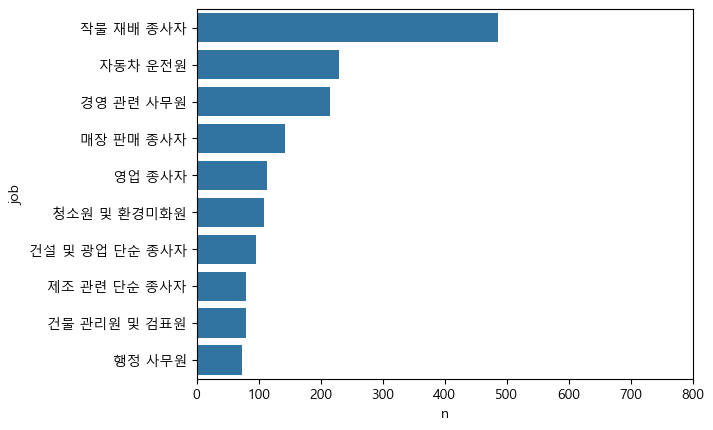

In [ ]:
# 2019년 코드 (셀 53)
# 남성 직업 빈도 막대 그래프
sns.barplot(data= job_male_2019, y='job', x='n').set(xlim= (0,800))


[(0.0, 800.0)]

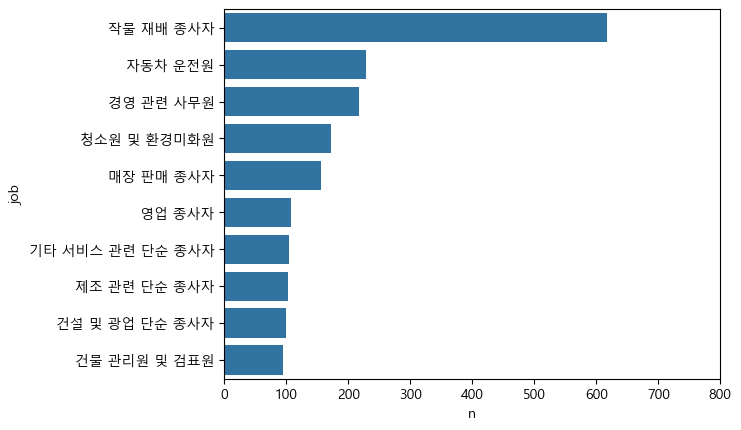

In [ ]:

# 2023년 코드 (셀 53)
# 남성 직업 빈도 막대 그래프
sns.barplot(data= job_male_2023, y='job', x='n').set(xlim= (0,800))

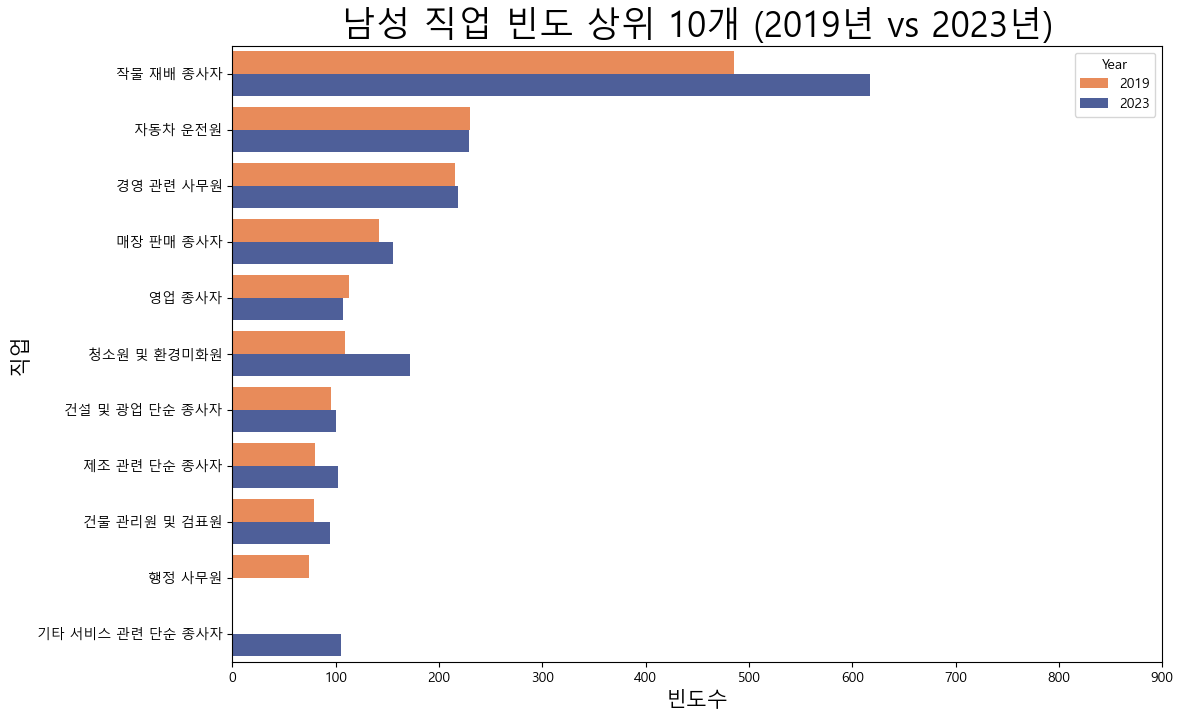

In [ ]:

# 연도 정보 추가
job_male_2019['year'] = 2019
job_male_2023['year'] = 2023

# 데이터프레임 통합
combined_job_data = pd.concat([job_male_2019, job_male_2023])

# 색상 설정
palette = {2023: '#4158A6', 2019: '#FF8343'}

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_job_data, y='job', x='n', hue='year', palette=palette)

# x축 범위 설정
plt.xlim(0, 900)  # x축 범위는 데이터에 맞게 조정합니다.

# 그래프 제목과 레이블 설정
plt.title('남성 직업 빈도 상위 10개 (2019년 vs 2023년)', fontsize=25)
plt.xlabel('빈도수', fontsize=15)
plt.ylabel('직업', fontsize=15)

# 범례 표시
plt.legend(title='Year')

# 차트 표시
plt.show()

[(0.0, 800.0)]

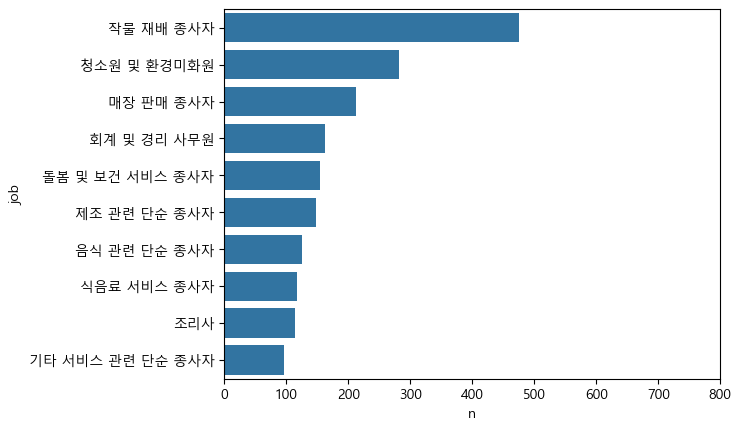

In [ ]:
# 2019년 코드 (셀 54)
sns.barplot(data= job_Female_2019, y='job', x='n').set(xlim= (0,800))


[(0.0, 800.0)]

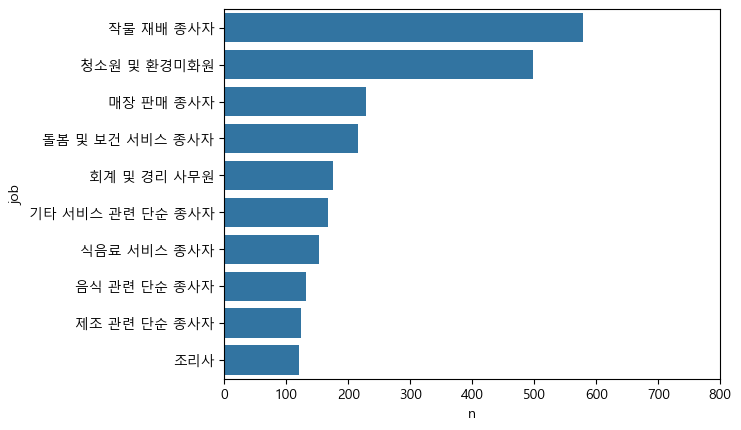

In [ ]:

# 2023년 코드 (셀 54)
sns.barplot(data= job_Female_2023, y='job', x='n').set(xlim= (0,800))

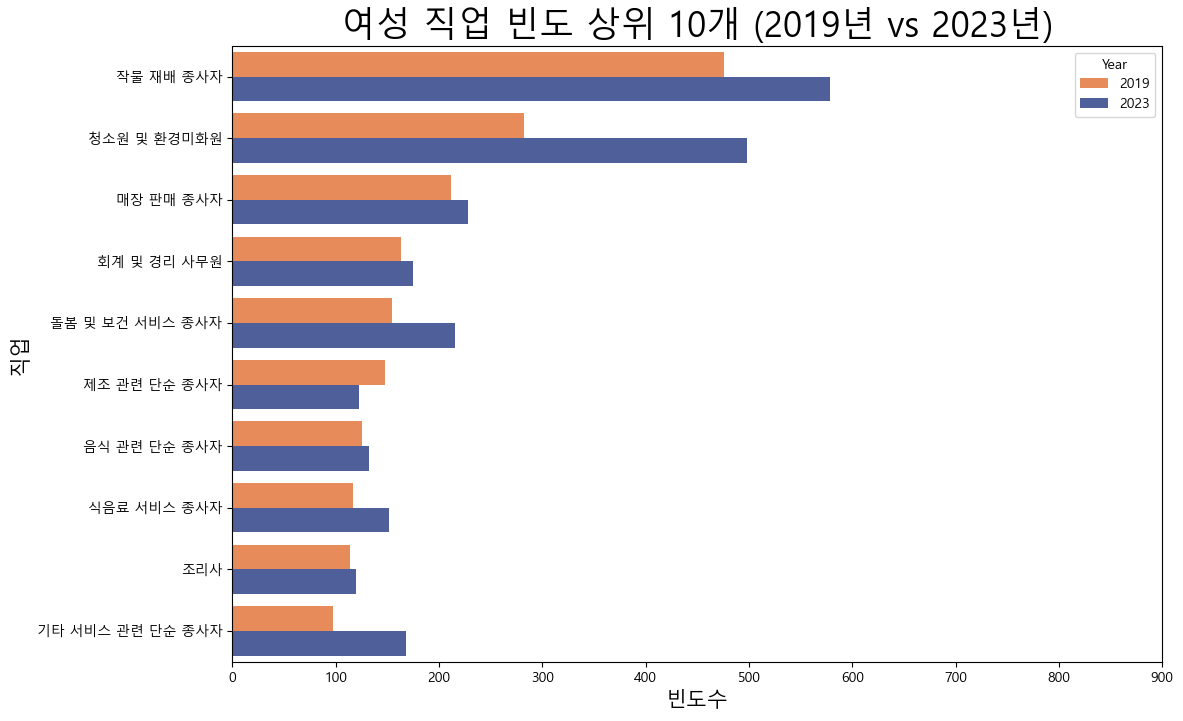

In [ ]:
# 연도 정보 추가
job_Female_2019['year'] = 2019
job_Female_2023['year'] = 2023

# 데이터프레임 통합
combined_job_data = pd.concat([job_Female_2019, job_Female_2023])

# 색상 설정
palette = {2023: '#4158A6', 2019: '#FF8343'}

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_job_data, y='job', x='n', hue='year', palette=palette)

# x축 범위 설정
plt.xlim(0, 900)  # x축 범위는 데이터에 맞게 조정합니다.

# 그래프 제목과 레이블 설정
plt.title('여성 직업 빈도 상위 10개 (2019년 vs 2023년)', fontsize=25)
plt.xlabel('빈도수', fontsize=15)
plt.ylabel('직업', fontsize=15)

# 범례 표시
plt.legend(title='Year')

# 차트 표시
plt.show()

### 종교 유무에 따른 이혼율

In [ ]:
# 타입확인
print(welfare_2023['religion23'].dtype)
print(welfare_2019['religion19'].dtype)

float64
float64


In [ ]:
#빈도수
print(welfare_2023['religion23'].value_counts())
print(welfare_2019['religion19'].value_counts())

religion23
2.0    8996
1.0    6935
Name: count, dtype: int64
religion19
2.0    7815
1.0    6603
Name: count, dtype: int64


In [ ]:
#2023
# 전처리 - 1 : 있음, 2 : 없음, 9: 모름/무응답 
# 종교 유무 이름 부여 
welfare_2023['religion23'] = np.where(welfare_2023['religion23'] == 1, 'Yes', 'No')

# 빈도구하기
print(welfare_2023['religion23'].value_counts())


#2019
# 전처리 - 1 : 있음, 2 : 없음, 9: 모름/무응답 
# 종교 유무 이름 부여 
welfare_2019['religion19'] = np.where(welfare_2019['religion19'] == 1, 'Yes', 'No')

# 빈도구하기
print(welfare_2019['religion19'].value_counts())

religion23
No     8996
Yes    6935
Name: count, dtype: int64
religion19
No     7815
Yes    6603
Name: count, dtype: int64


<Axes: xlabel='religion23', ylabel='count'>

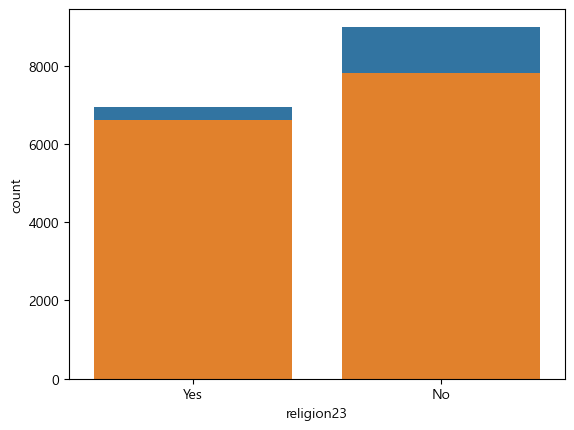

In [ ]:
# 시각화
sns.countplot(data=welfare_2023, x='religion23')
sns.countplot(data=welfare_2019, x='religion19')

In [ ]:
# 혼인 상태 여부
welfare_2023['marriage_type23'].dtype
welfare_2019['marriage_type19'].dtype

dtype('float64')

In [ ]:
# 항목별 빈도수
welfare_2023['marriage_type23'].value_counts()
welfare_2019['marriage_type19'].value_counts()

marriage_type19
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [ ]:
# 이혼여부 
# 0.비해당(18세 미만) 1.유배우  2.사별  3.이혼   4.별거 
# 5.미혼(18세이상, 미혼모 포함)   6.기타(사망 등)
# => 1 : marriage, 3: divorce, - 그외: etc 

welfare_2023['marriage23'] = np.where(welfare_2023['marriage_type23'] == 1, 'marriage', 
                      np.where(welfare_2023['marriage_type23'] == 3, 'divorce', 'etc'))

welfare_2019['marriage19'] = np.where(welfare_2019['marriage_type19'] == 1, 'marriage', 
                      np.where(welfare_2019['marriage_type19'] == 3, 'divorce', 'etc'))


In [ ]:
# 이혼 여부 별 빈도
n_divorce = welfare_2023.groupby('marriage23', as_index=False) \
                   .agg(n = ('marriage23', 'count'))
n_divorce

n_divorce19 = welfare_2019.groupby('marriage19', as_index=False) \
                   .agg(n = ('marriage19', 'count'))
n_divorce19


,marriage19,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage23', ylabel='n'>

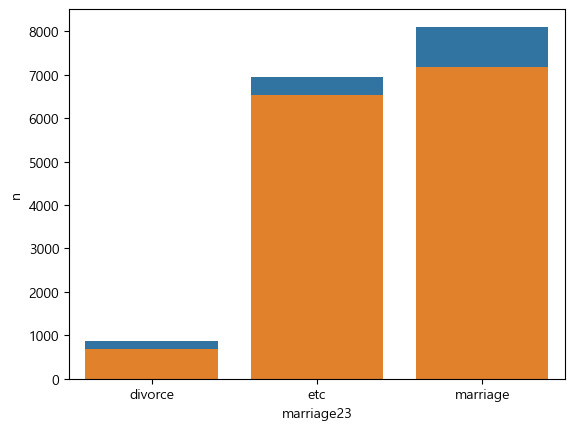

In [ ]:
sns.barplot(data= n_divorce, x= 'marriage23', y= 'n')
sns.barplot(data= n_divorce19, x= 'marriage19', y= 'n')

In [ ]:
# 연도별 데이터를 결합하기 위해 year 열 추가
n_divorce['year'] = 2023
n_divorce19['year'] = 2019

# 두 데이터프레임을 결합
combined_data = pd.concat([
    n_divorce.rename(columns={'marriage23': 'marriage'}),
    n_divorce19.rename(columns={'marriage19': 'marriage'})
])

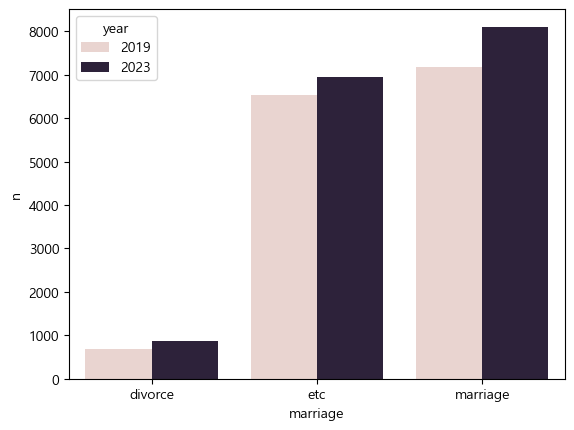

In [ ]:
# 그래프 그리기
sns.barplot(data=combined_data, x='marriage', y='n', hue='year')
plt.show()

In [ ]:
# 종교 유무에 따른 이혼율 분석 
# etc 제외 
# religion별 분리 
# marriage 추출 
# 비율 구하기 
rel_dev23 = welfare_2023.query('marriage23 != "etc"') \
                 .groupby('religion23', as_index=False) \
                 ['marriage23'] \
                 .value_counts(normalize=True)

print(rel_dev23)


  religion23 marriage23  proportion
0         No   marriage    0.900703
1         No    divorce    0.099297
2        Yes   marriage    0.905428
3        Yes    divorce    0.094572


In [ ]:

rel_dev19 = welfare_2019.query('marriage19 != "etc"') \
                 .groupby('religion19', as_index=False) \
                 ['marriage19'] \
                 .value_counts(normalize=True)

print(rel_dev19)

  religion19 marriage19  proportion
0         No   marriage    0.905045
1         No    divorce    0.094955
2        Yes   marriage    0.920469
3        Yes    divorce    0.079531


In [ ]:
# 2019년 데이터에서 'divorce'에 해당하는 데이터만 추출
rel_dev19 = rel_dev19.query('marriage19 == "divorce"') \
                     .assign(proportion = rel_dev19['proportion'] * 100) \
                     .round(1)

# 결과 출력
print(rel_dev19)


  religion19 marriage19  proportion
1         No    divorce         9.5
3        Yes    divorce         8.0


In [ ]:
# 2019년 코드 (셀 66)
# 전처리
# 1.divoce 추출 (이혼)
# 2.이혼에 해당하는 값만 추출한다음 proportion을 백분율로 바꾸고 
# 3.소수점 첫째자리 까지 반올림
rel_dev19 = rel_dev19.query('marriage19 == "divorce"') \
                 .assign(proportion =rel_dev['proportion'] * 100) \
                 .round(1)
rel_dev19


,religion19,marriage19,proportion
1,No,divorce,99000.0
3,Yes,divorce,95000.0


In [ ]:

# 2023년 코드 (셀 66)
# 전처리
# 1.divoce 추출 (이혼)
# 2.이혼에 해당하는 값만 추출한다음 proportion을 백분율로 바꾸고 
# 3.소수점 첫째자리 까지 반올림
rel_dev23 = rel_dev.query('marriage23 == "divorce"') \
                 .assign(proportion =rel_dev['proportion'] * 100) \
                 .round(1)
rel_dev23

,religion23,marriage23,proportion
1,No,divorce,99000.0
3,Yes,divorce,95000.0


In [144]:
# 2019년 코드 (셀 67)
sns.barplot(data =rel_dev19, x='religion' ,y='proportion')


ValueError: Could not interpret value `religion` for `x`. An entry with this name does not appear in `data`.

In [ ]:

# 2023년 코드 (셀 67)
sns.barplot(data =rel_dev, x='religion' ,y='proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석

In [ ]:
# 2019년 코드 (셀 69)
age_div =welfare_2019.query('marriage ! ="etc"') \
                .groupby('ageg',as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)

age_div

# 2023년 코드 (셀 69)
age_div =welfare_2023.query('marriage ! ="etc"') \
                .groupby('ageg',as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)

age_div

In [ ]:
# 2019년 코드 (셀 70)
# 연령대 및 이혼 여부별 빈도
welfare_2019.query('marriage ! ="etc"') \
       .groupby('ageg',as_index=False) \
       ['marriage'] \
       .value_counts()


# 2023년 코드 (셀 70)
# 연령대 및 이혼 여부별 빈도
welfare_2023.query('marriage ! ="etc"') \
       .groupby('ageg',as_index=False) \
       ['marriage'] \
       .value_counts()


In [ ]:
# 2019년 코드 (셀 71)
# 연령대별 이혼율 그래프
#초년 제외, 이혼 추출
age_div = age_div.query('ageg !="young"& marriage == "divorce"') \
                 .assign(proportion =age_div['proportion']* 100) \
                 .round(1)

age_div

# 2023년 코드 (셀 71)
# 연령대별 이혼율 그래프
#초년 제외, 이혼 추출
age_div = age_div.query('ageg !="young"& marriage == "divorce"') \
                 .assign(proportion =age_div['proportion']* 100) \
                 .round(1)

age_div

In [ ]:
# 2019년 코드 (셀 72)
sns.barplot(data=age_div,x='ageg',y='proportion')

# 2023년 코드 (셀 72)
sns.barplot(data=age_div,x='ageg',y='proportion')

### 지역별 연령대 비율

In [ ]:
# 2019년 코드 (셀 74)
# 전처리
welfare_2019['code_region'].dtype

# 2023년 코드 (셀 74)
# 전처리
welfare_2023['code_region'].dtype

In [ ]:
# 2019년 코드 (셀 75)
welfare_2019['code_region'].value_counts() #빈도수(지역)

# 2023년 코드 (셀 75)
welfare_2023['code_region'].value_counts() #빈도수(지역)

In [ ]:
# 2019년 코드 (셀 76)
# 지역코드 목록 만들기
list_region = pd.DataFrame({'code_region': [1,2,3,4,5,6,7],
                            'region'     : ['서울',
                                            '수도권(인천/경기)',
                                            '부산/경남/울산',
                                            '대구/경북',
                                            '대전/충남',
                                            '강원/충북',
                                            '광주/전남/전북/제주도',
                                            ]})
list_region

# 2023년 코드 (셀 76)
# 지역코드 목록 만들기
list_region = pd.DataFrame({'code_region': [1,2,3,4,5,6,7],
                            'region'     : ['서울',
                                            '수도권(인천/경기)',
                                            '부산/경남/울산',
                                            '대구/경북',
                                            '대전/충남',
                                            '강원/충북',
                                            '광주/전남/전북/제주도',
                                            ]})
list_region

In [ ]:
# 2019년 코드 (셀 77)
welfare_2019 =welfare_2019.merge(list_region, how='lefrt', on='code_region')

# 2023년 코드 (셀 77)
welfare_2023 =welfare_2023.merge(list_region, how='left', on='code_region')

In [ ]:
# 2019년 코드 (셀 78)
welfare_2019[['code_region','region']].head(10)

# 2023년 코드 (셀 78)
welfare_2023[['code_region','region']].head(10)

In [ ]:
# 2019년 코드 (셀 79)
#지역별 연령대 비율표
#1. region 별 분리
#2. ageg 추출
#3. 비율구하기
region_ageg =welfare_2019.groupby('region',as_index=False) \
                        ['ageg'] \
                        .value_counts(normalize=True)
region_ageg

# 2023년 코드 (셀 79)
#지역별 연령대 비율표
#1. region 별 분리
#2. ageg 추출
#3. 비율구하기
region_ageg =welfare_2023.groupby('region',as_index=False) \
                        ['ageg'] \
                        .value_counts(normalize=True)
region_ageg

In [ ]:
# 2019년 코드 (셀 80)
# 시각화
sns.barplot(data= region_ageg, y='region',x='proportion',hue='ageg')

# 2023년 코드 (셀 80)
# 시각화
sns.barplot(data= region_ageg, y='region',x='proportion',hue='ageg')

In [ ]:
# 2019년 코드 (셀 81)
# 지역끼리 비교하기 쉽도록 연령대별 막대를 누적한 '누적 비율 막대 그래프 생성'
# 피펏: 행과 열을 회전해 표의 구성을 바꾸는 작업
pivot_df = (
    region_ageg[['region', 'ageg', 'proportion']]
    .pivot(index='region', columns='ageg', values='proportion')
)

pivot_df

# 2023년 코드 (셀 81)
# 지역끼리 비교하기 쉽도록 연령대별 막대를 누적한 '누적 비율 막대 그래프 생성'
# 피펏: 행과 열을 회전해 표의 구성을 바꾸는 작업
pivot_df = (
    region_ageg[['region', 'ageg', 'proportion']]
    .pivot(index='region', columns='ageg', values='proportion')
)

pivot_df

In [ ]:
# 2019년 코드 (셀 82)
# 가로 막대 회전 사각화
pivot_df.plot.barh(stacked= True)

# 2023년 코드 (셀 82)
# 가로 막대 회전 사각화
pivot_df.plot.barh(stacked= True)

In [ ]:
# 2019년 코드 (셀 83)
# 막대 정렬
# 노년층 기준 정렬, 변수순서 바꾸기
reorder_df=pivot_df.sort_values('old')[['young','middle', 'old']]
reorder_df

# 2023년 코드 (셀 83)
# 막대 정렬
# 노년층 기준 정렬, 변수순서 바꾸기
reorder_df=pivot_df.sort_values('old')[['young','middle', 'old']]
reorder_df

In [ ]:
# 2019년 코드 (셀 84)
# 누적 가로 막대 그래프
reorder_df.plot.barh(stacked= True)

# 2023년 코드 (셀 84)
# 누적 가로 막대 그래프
reorder_df.plot.barh(stacked= True)

In [ ]:
# 2019년 코드 (셀 85)


# 2023년 코드 (셀 85)
